In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from yahoo_fin.stock_info import get_data
from datetime import datetime
from scipy.stats import pearsonr

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [2]:
def download_data(symbol):
    df = get_data(symbol)#https://finance.yahoo.com/
    #print(df.tail())
    columns_dic={"open":"Open","high":"High","low":"Low","close":"Close","adjclose":"AdjClose","volume":"Volume"}
    #print("========================df.rename==================================================")
    df=df.rename(columns=columns_dic)
    df=df[["Open","High","Low","Close","AdjClose","Volume"]]
    df.index.name="Date"
    df.to_csv("data\\"+symbol+".csv")
    # print(df.tail())

In [3]:
# from yahoo, https://tw.stock.yahoo.com/class-quote?sectorId=2&exchange=TAI
# 味全 1201.TW, 味王 1203.TW, 大成 1210.TW, 大飲 1213.TW, 卜蜂 1215.TW,
# 統一 1216.TW, 愛之味 1217.TW, 泰山 1218.TW, 福壽 1219.TW, 台榮 1220.TW, 福懋油 1225.TW,
# 佳格 1227.TW, 聯華 1229.TW, 聯華食 1231.TW, 大統益 1232.TW, 天仁 1233.TW, 黑松 1234.TW,
# 興泰 1235.TW, 宏亞 1236.TW, 鮮活果汁-KY 1256.TW, 南僑 1702.TW, 臺鹽 1737.TW, 立萬利 3054.TW

food_stock_ticker = ["1201.TW", "1203.TW", "1210.TW", "1213.TW", "1215.TW",
 "1216.TW", "1217.TW", "1218.TW", "1219.TW", "1220.TW", "1225.TW",
 "1227.TW", "1229.TW", "1231.TW", "1232.TW", "1233.TW", "1234.TW",
 "1235.TW", "1236.TW", "1256.TW", "1702.TW", "1737.TW", "3054.TW"]
taiex_ticker = "^TWII"

for symbol in food_stock_ticker:
    download_data(symbol)
download_data(taiex_ticker)

In [4]:
def load_data(symbol):
    file_path = f"data\\{symbol}.csv"
    df = pd.read_csv(file_path, index_col="Date", na_values="n.a.")
    return df

In [5]:
food_data_dict = {symbol: load_data(symbol) for symbol in food_stock_ticker}
taiex_data = load_data(taiex_ticker)
print(food_data_dict)
print(taiex_data)


{'1201.TW':                  Open       High        Low      Close   AdjClose     Volume
Date                                                                        
2000-01-04   8.200000   8.300000   8.000000   8.150000   6.401604  2136000.0
2000-01-05   8.100000   8.700000   8.100000   8.700000   6.833615  4793379.0
2000-01-06   9.300000   9.300000   9.050000   9.300000   7.304900  4030261.0
2000-01-07   9.950000   9.950000   9.750000   9.950000   7.815456  8150591.0
2000-01-10  10.600000  10.600000  10.300000  10.600000   8.326013  8702809.0
...               ...        ...        ...        ...        ...        ...
2024-12-18  17.900000  18.000000  17.850000  17.950001  17.950001   143602.0
2024-12-19  17.900000  17.950001  17.799999  17.850000  17.850000   272531.0
2024-12-20  17.799999  17.850000  17.700001  17.750000  17.750000   391653.0
2024-12-23  17.799999  17.900000  17.799999  17.799999  17.799999   172633.0
2024-12-24  17.850000  17.900000  17.799999  17.900000  17.90000

In [6]:
all_food_data = pd.DataFrame()
for symbol, df in food_data_dict.items():
    if df is not None:
        df["Symbol"] = symbol
        all_food_data = pd.concat([all_food_data, df])

print(f"合併後的食品股數據包含 {len(all_food_data['Symbol'].unique())} 檔股票")
print(all_food_data.head())
print(f"台指期數據範圍: {taiex_data.index.min()} 到 {taiex_data.index.max()}")

合併後的食品股數據包含 23 檔股票
             Open   High    Low  Close  AdjClose     Volume   Symbol
Date                                                                
2000-01-04   8.20   8.30   8.00   8.15  6.401604  2136000.0  1201.TW
2000-01-05   8.10   8.70   8.10   8.70  6.833615  4793379.0  1201.TW
2000-01-06   9.30   9.30   9.05   9.30  7.304900  4030261.0  1201.TW
2000-01-07   9.95   9.95   9.75   9.95  7.815456  8150591.0  1201.TW
2000-01-10  10.60  10.60  10.30  10.60  8.326013  8702809.0  1201.TW
台指期數據範圍: 1997-07-02 到 2024-12-24


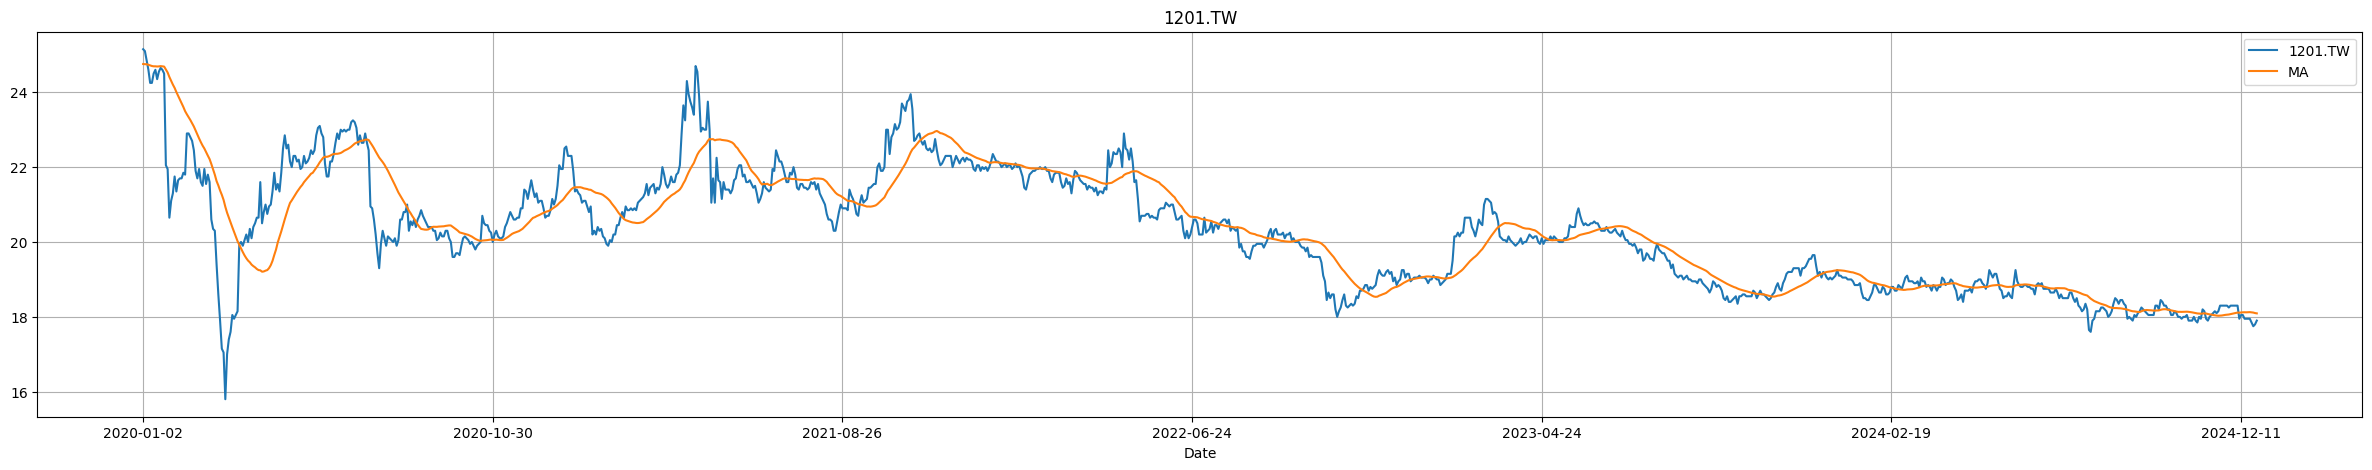

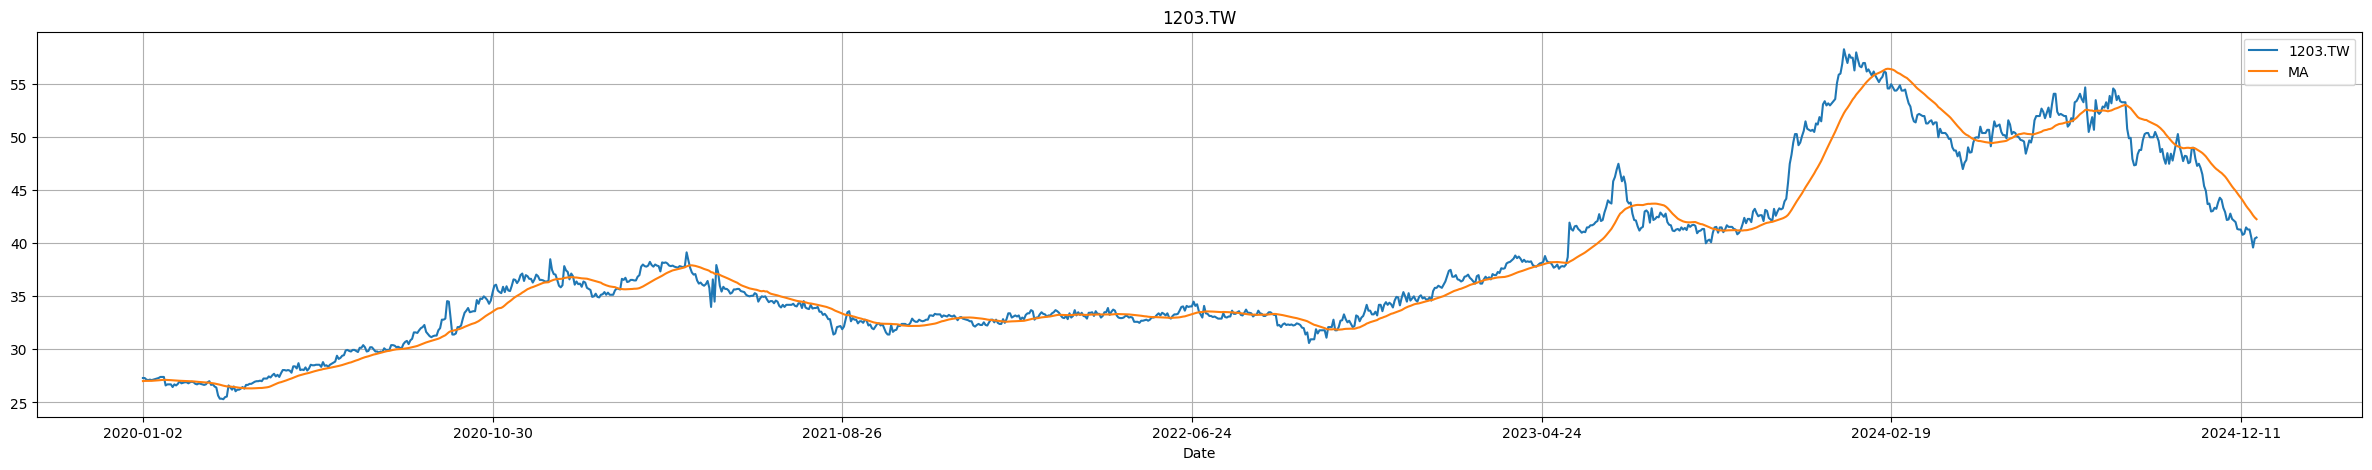

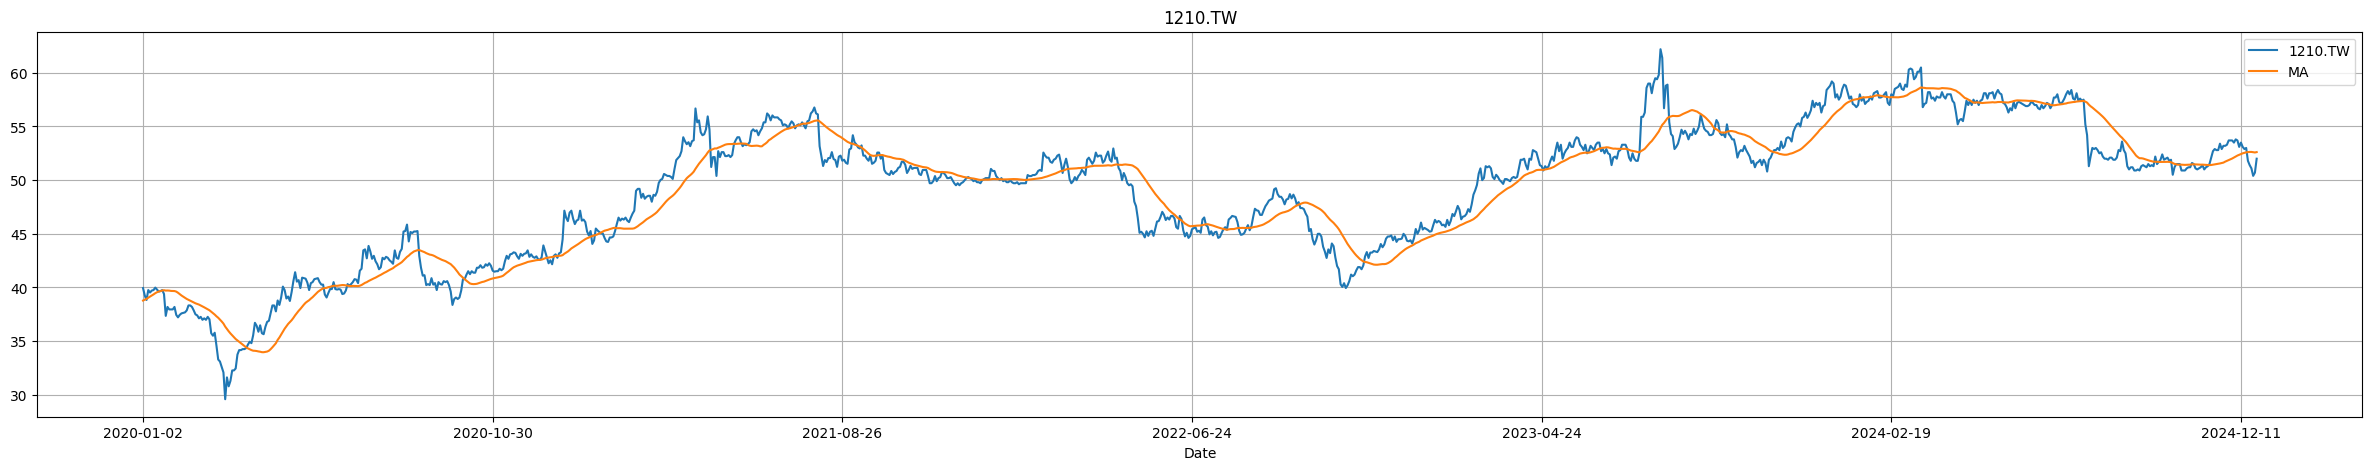

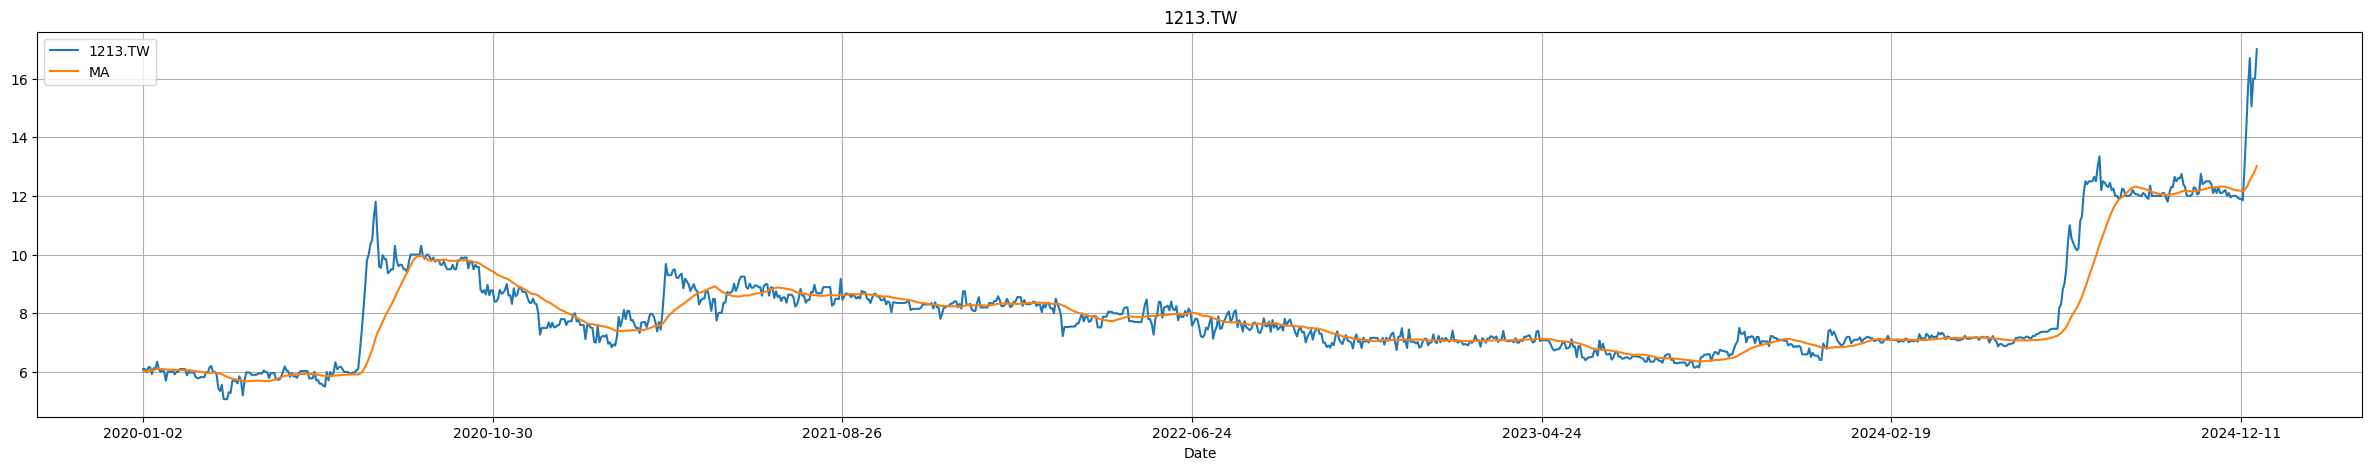

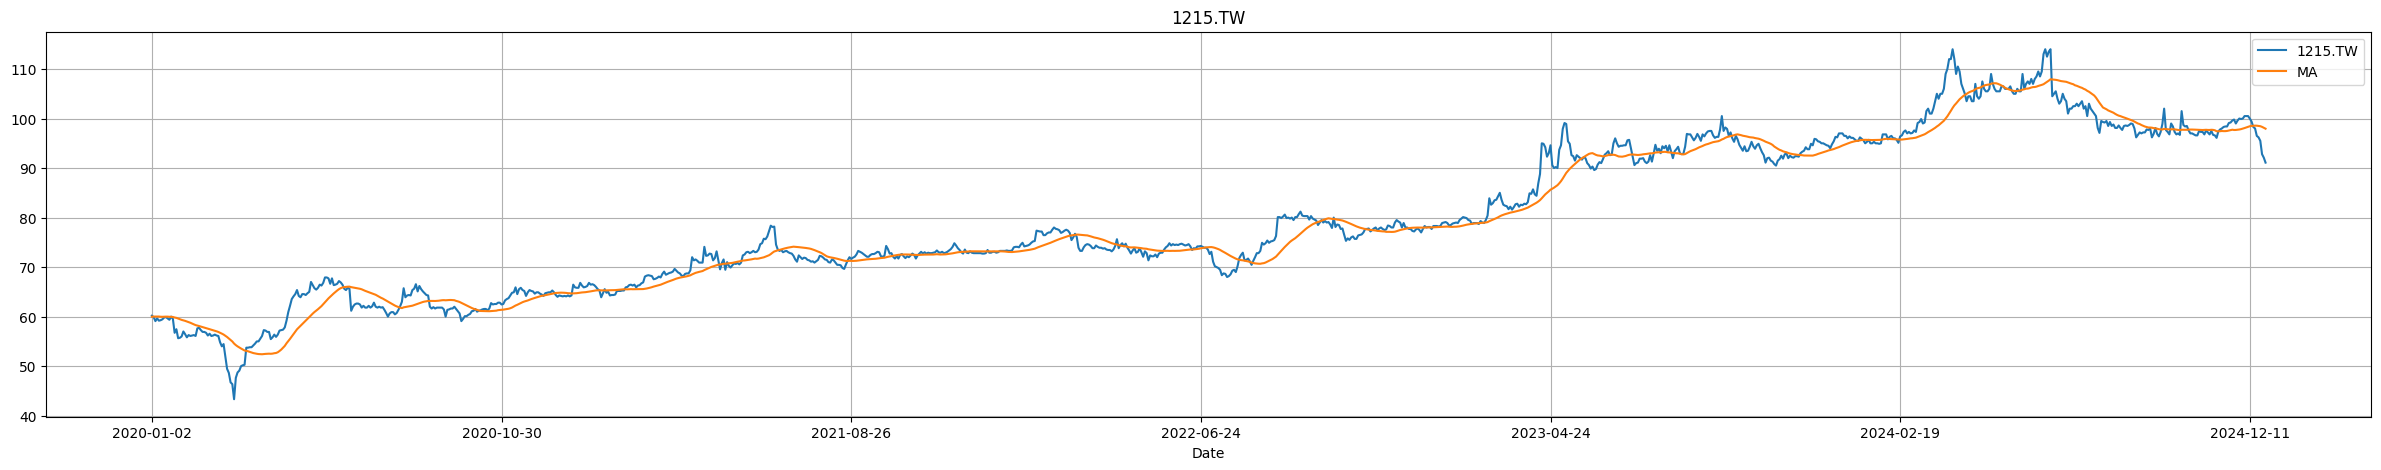

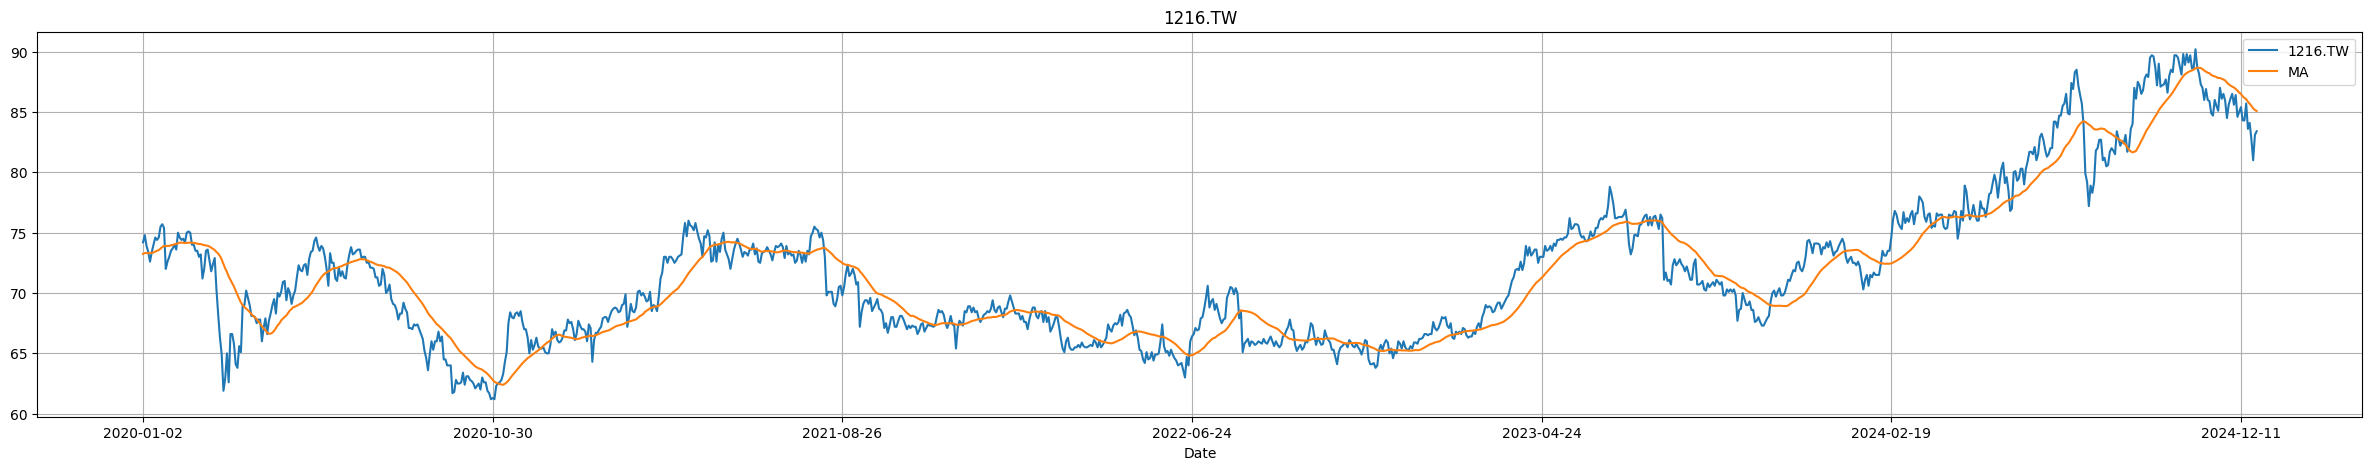

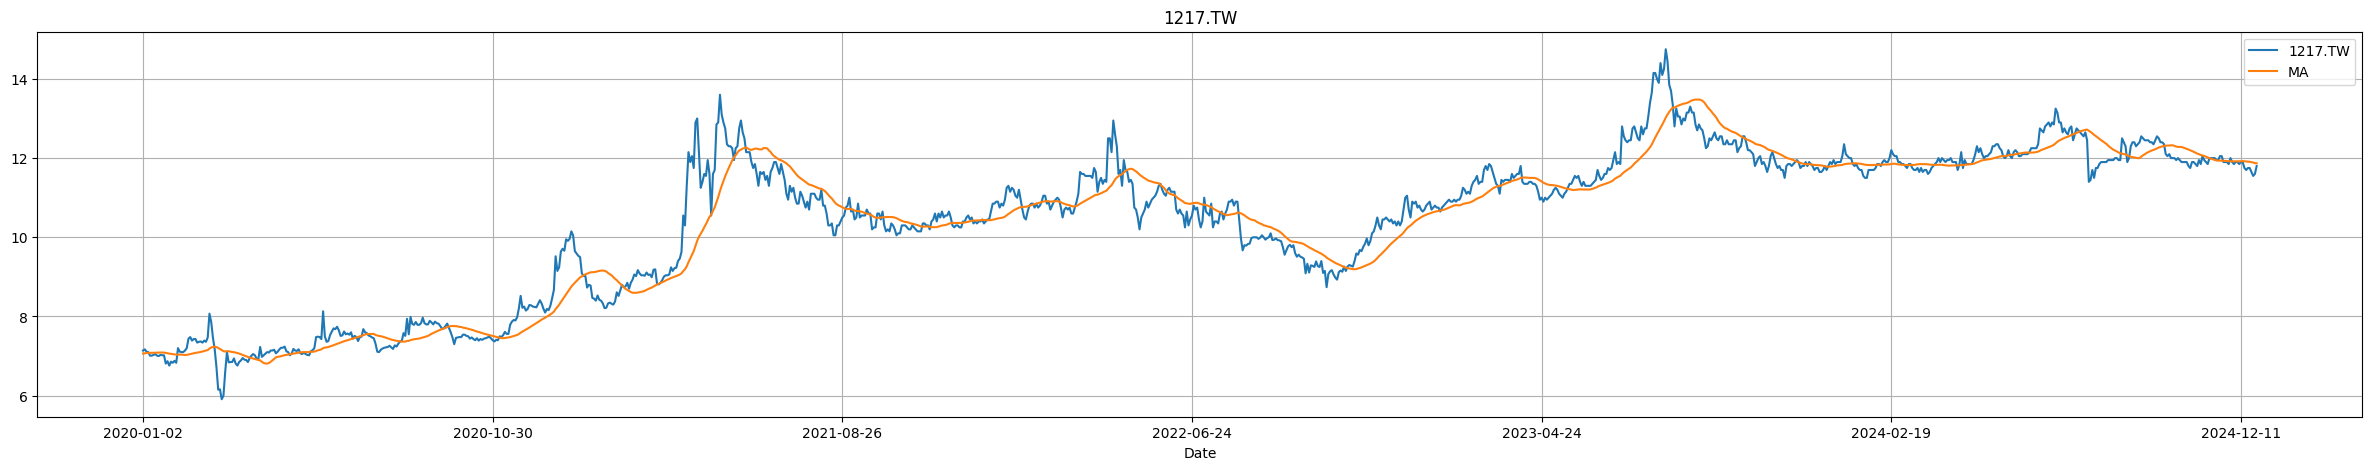

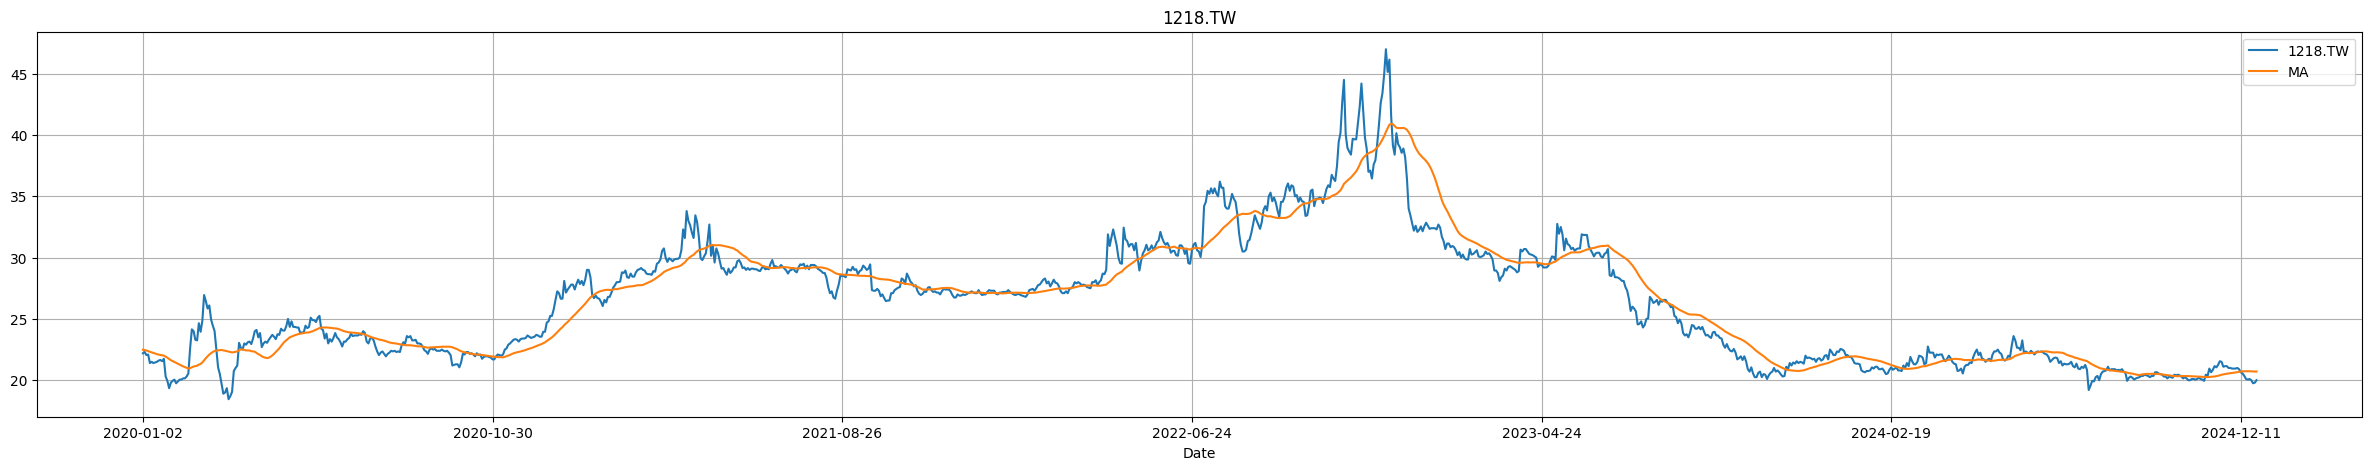

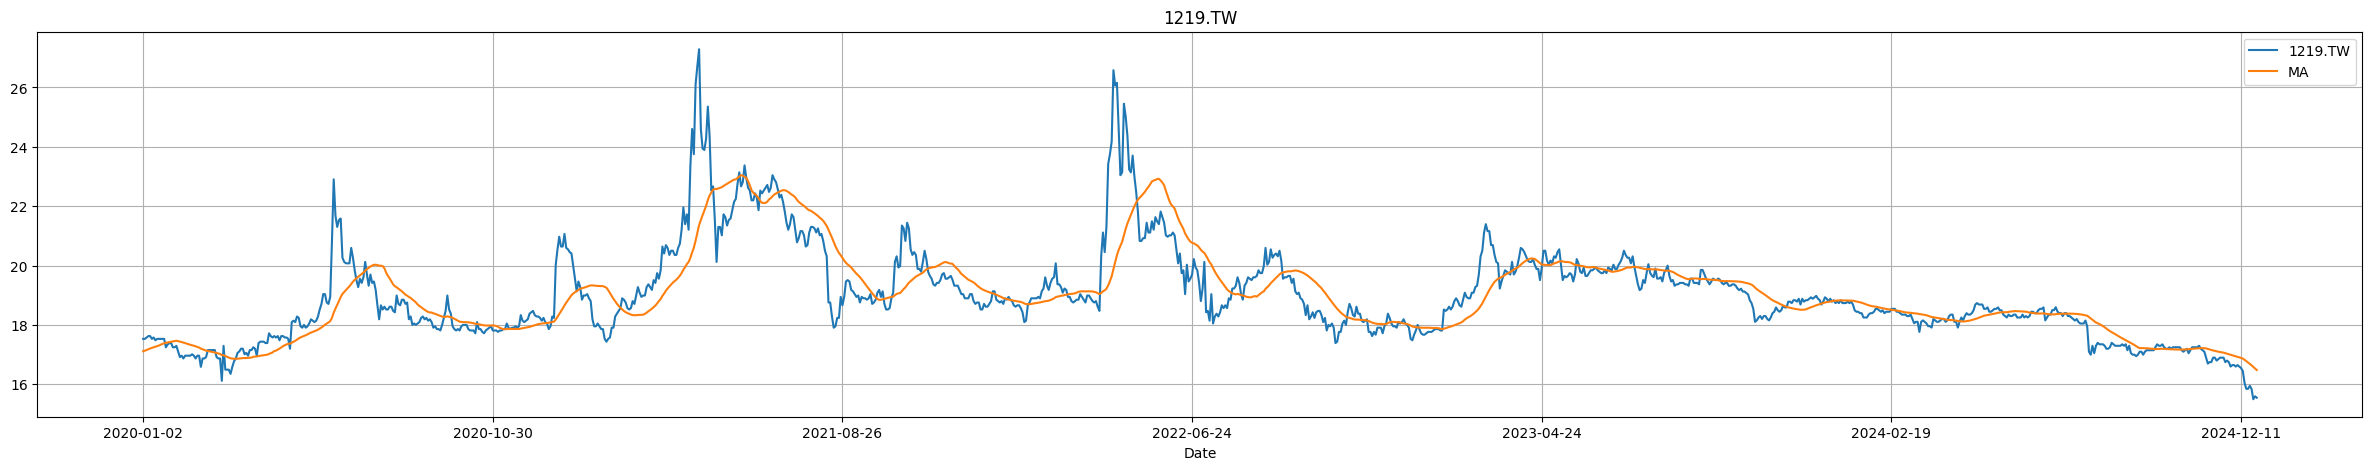

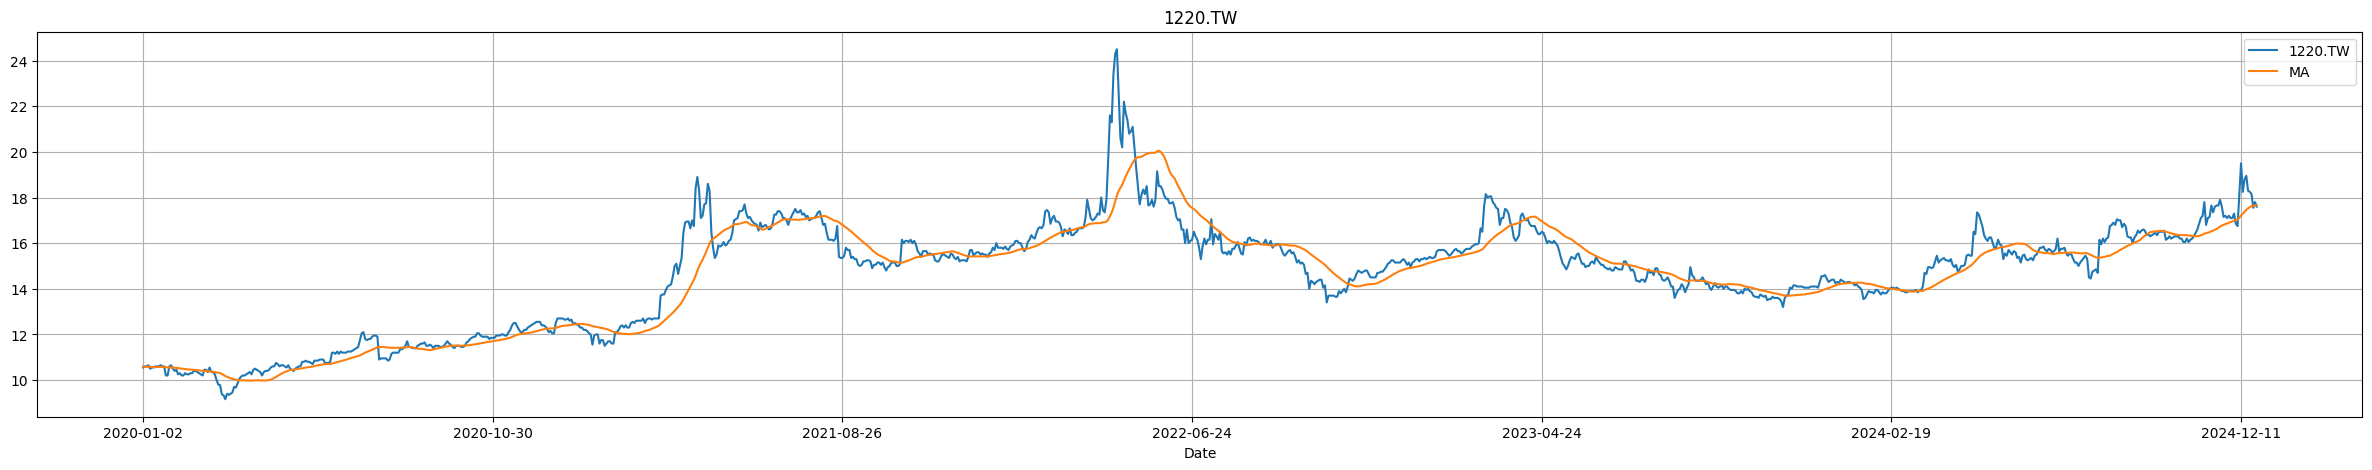

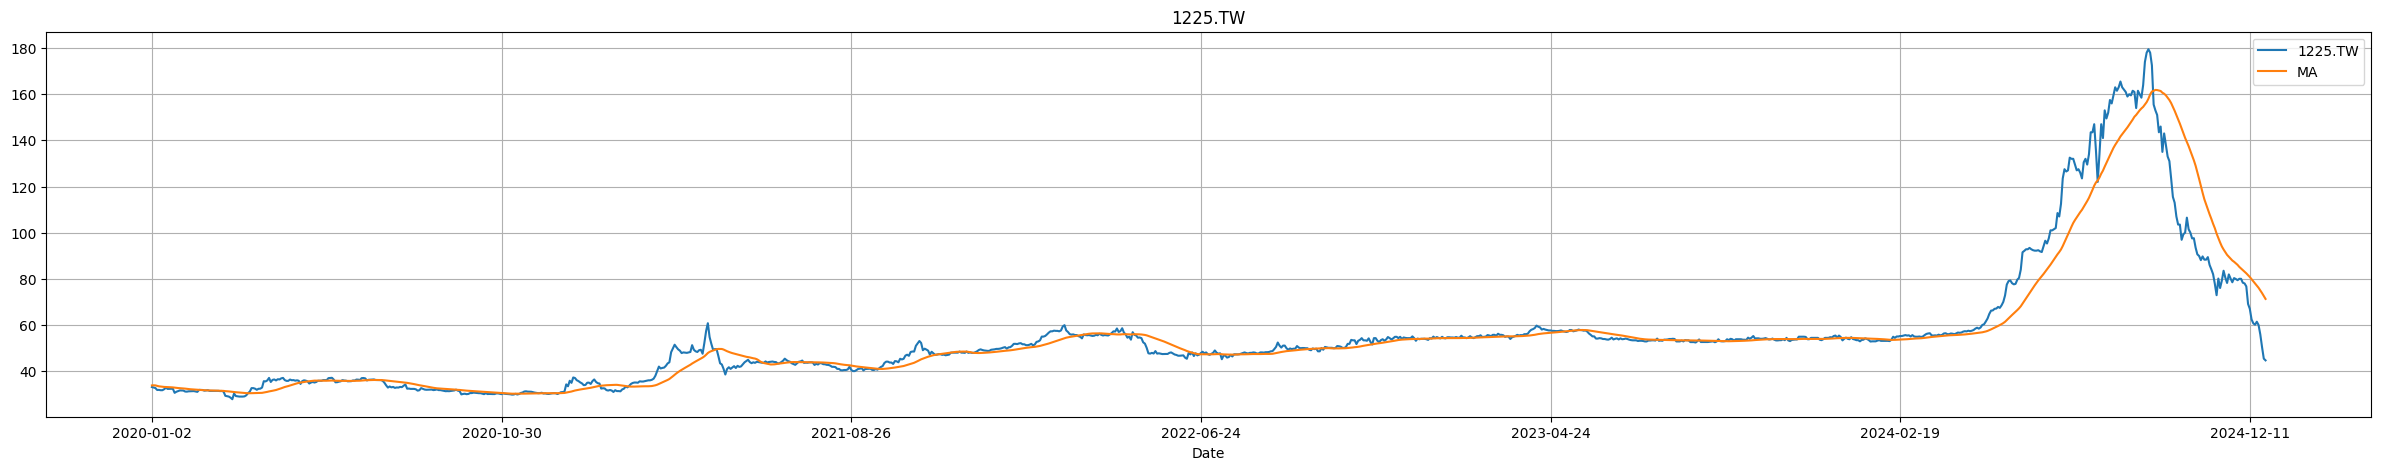

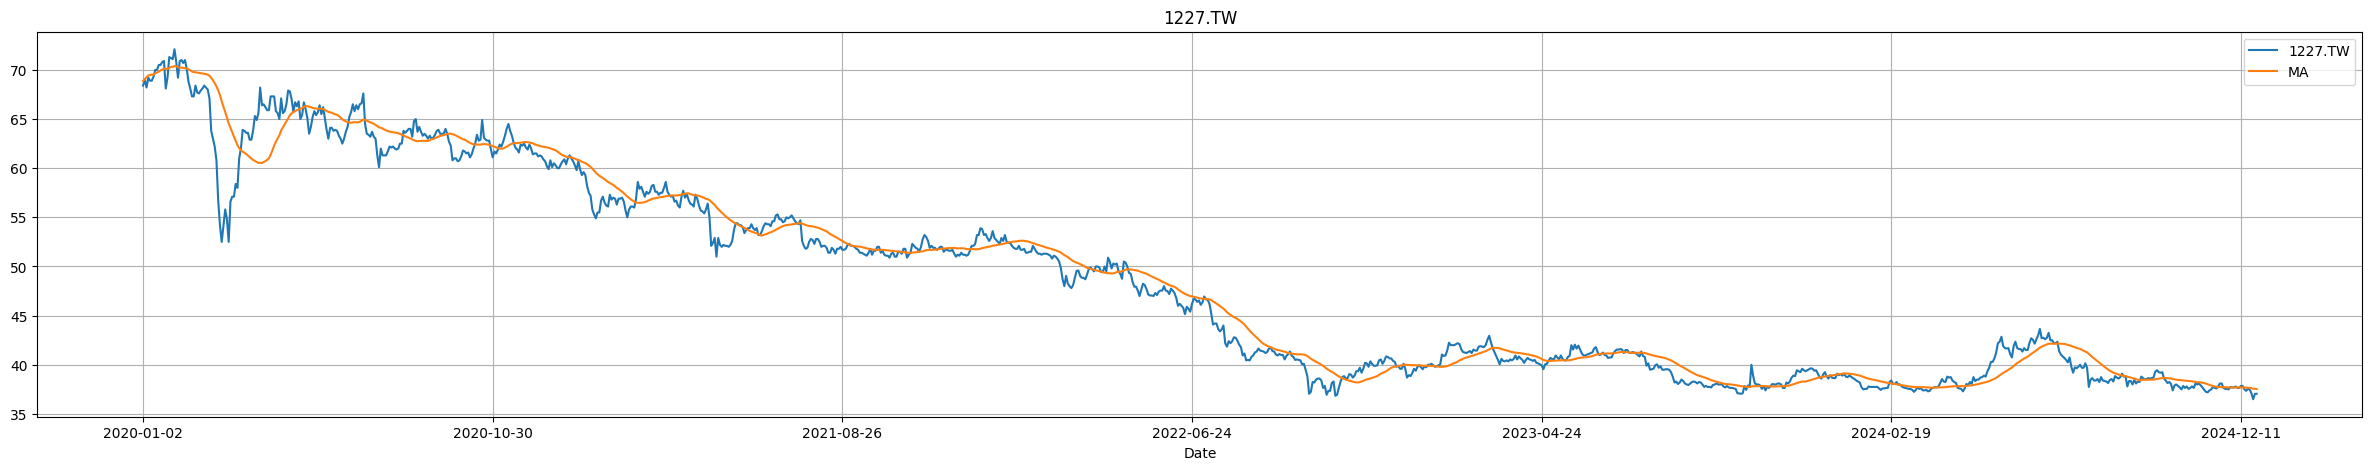

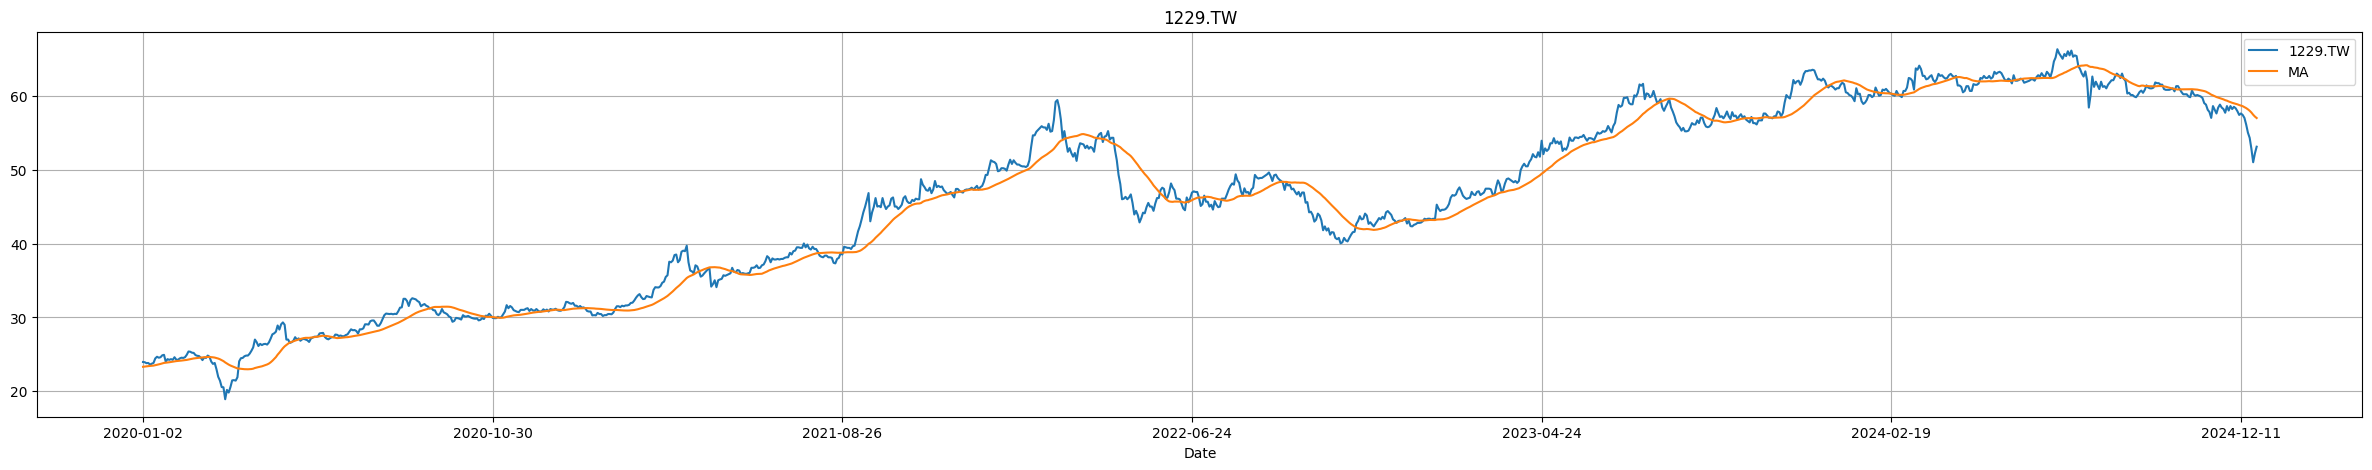

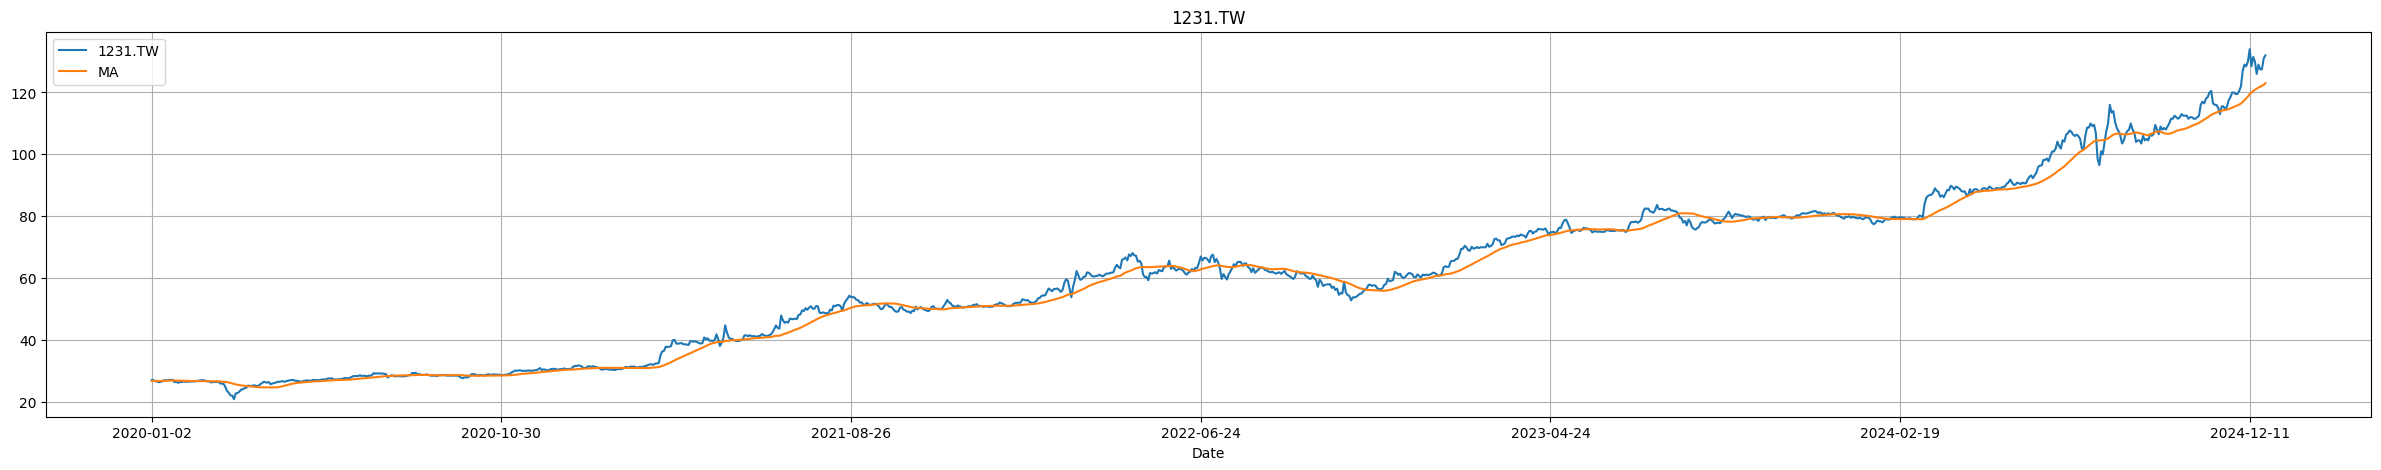

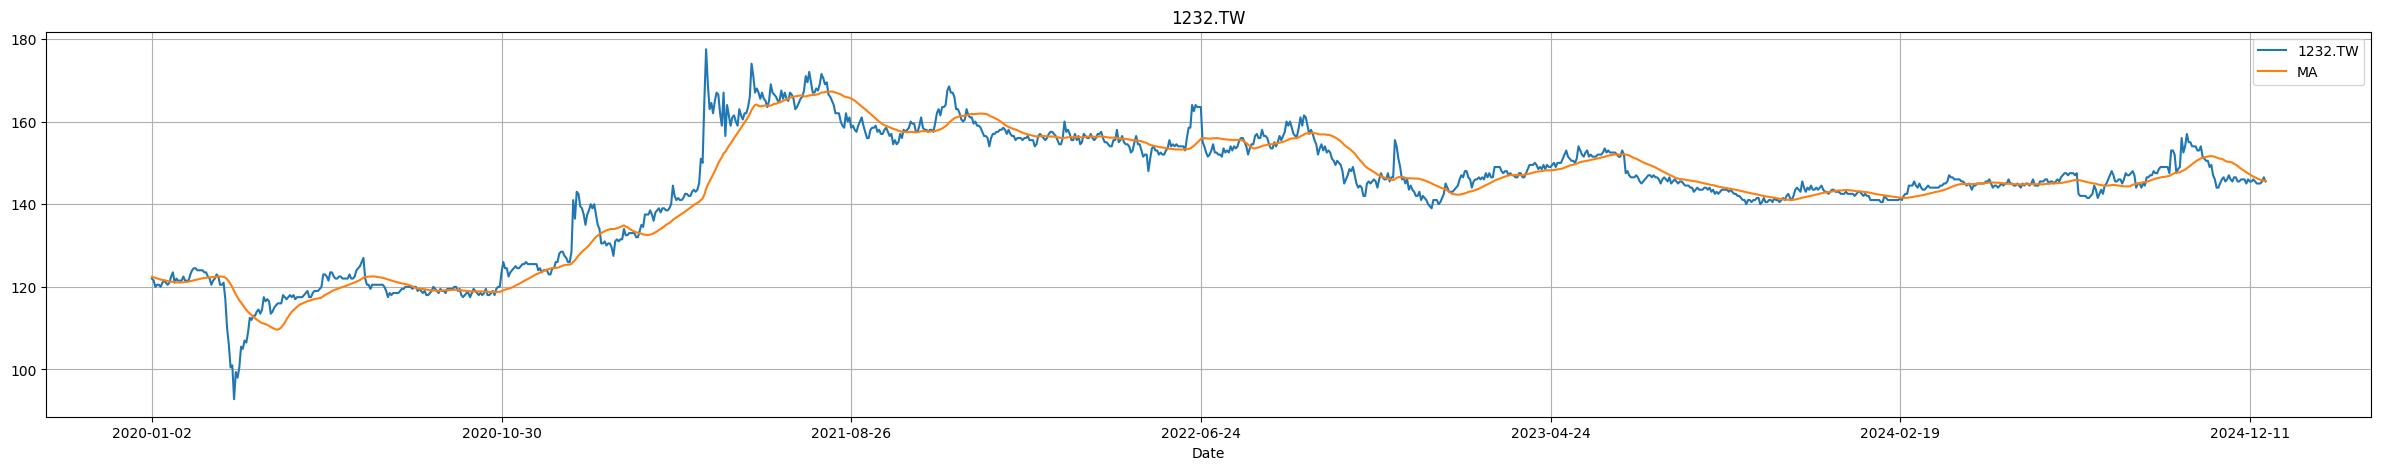

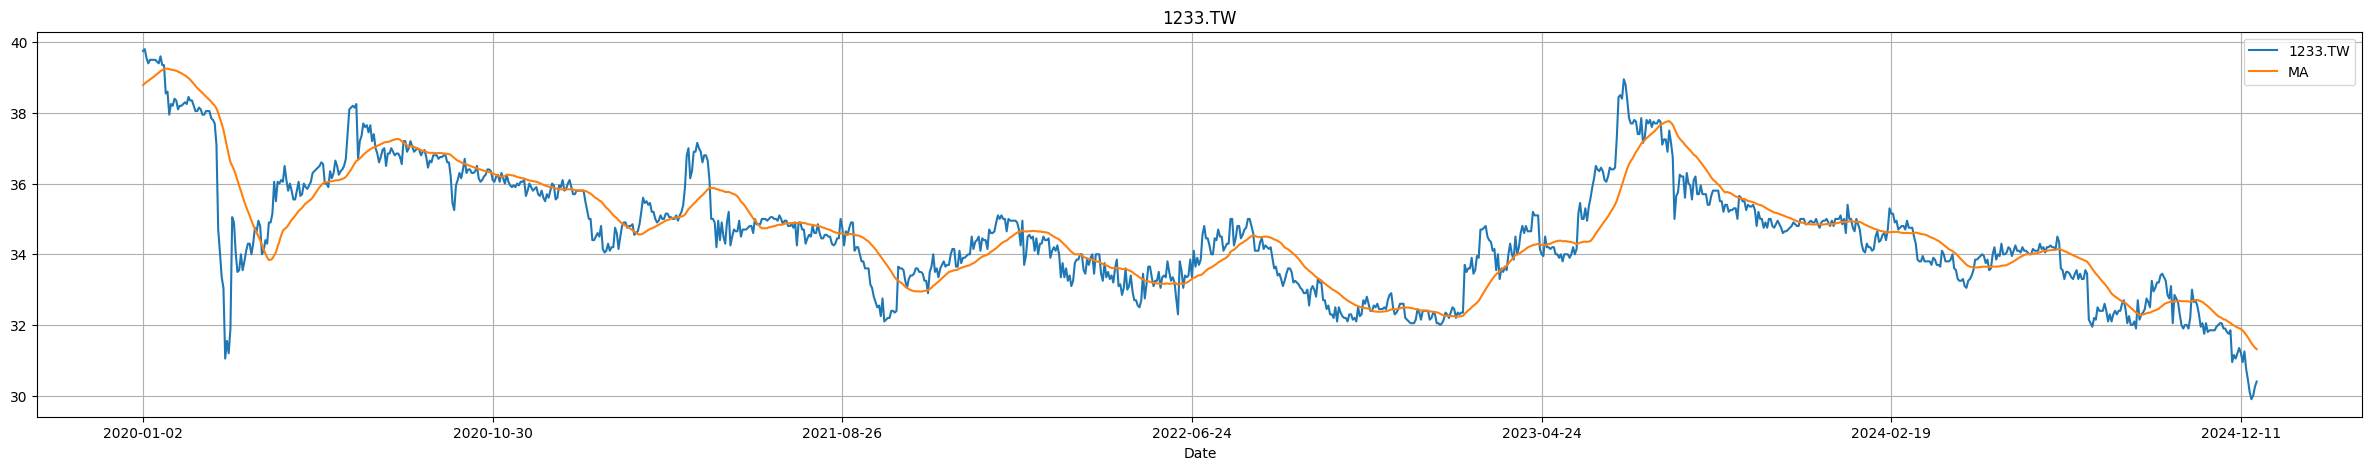

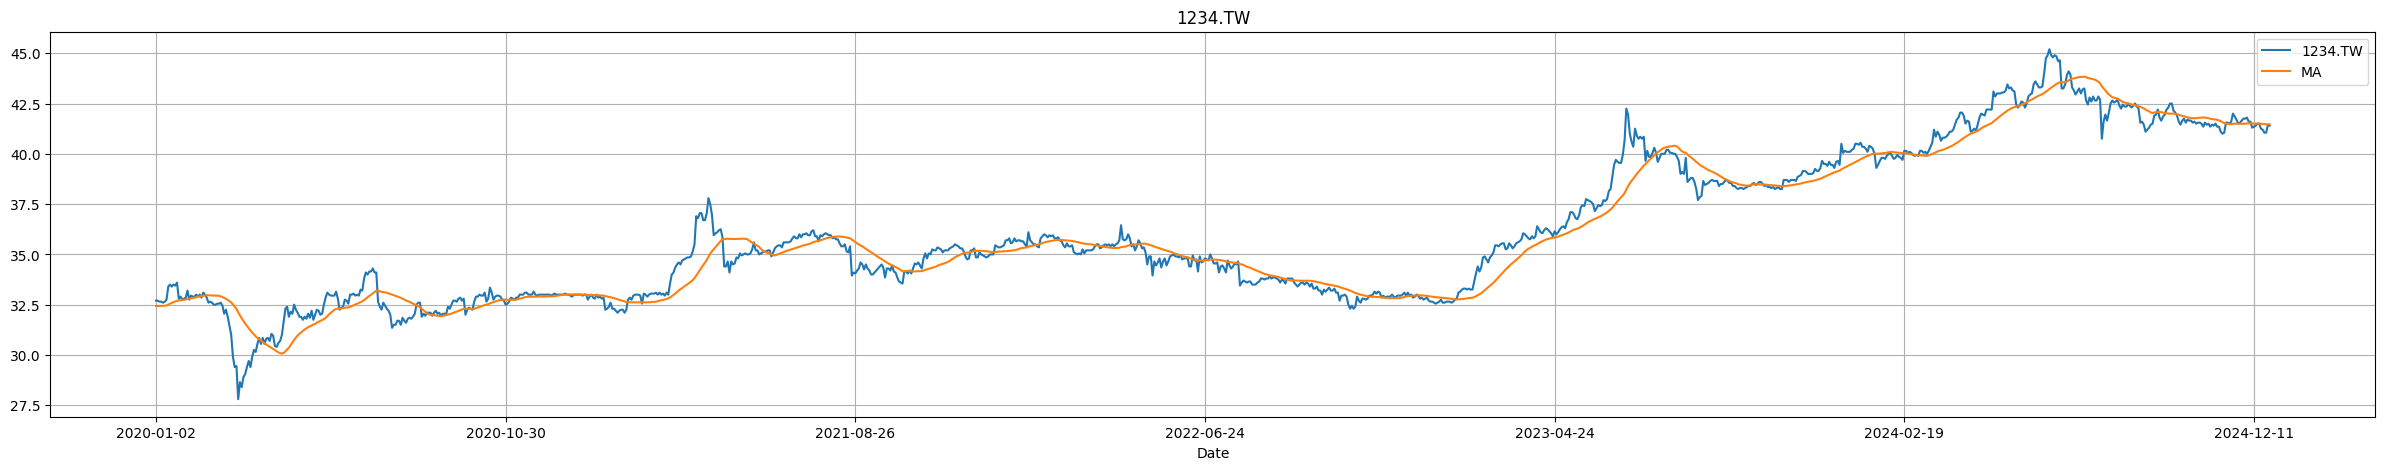

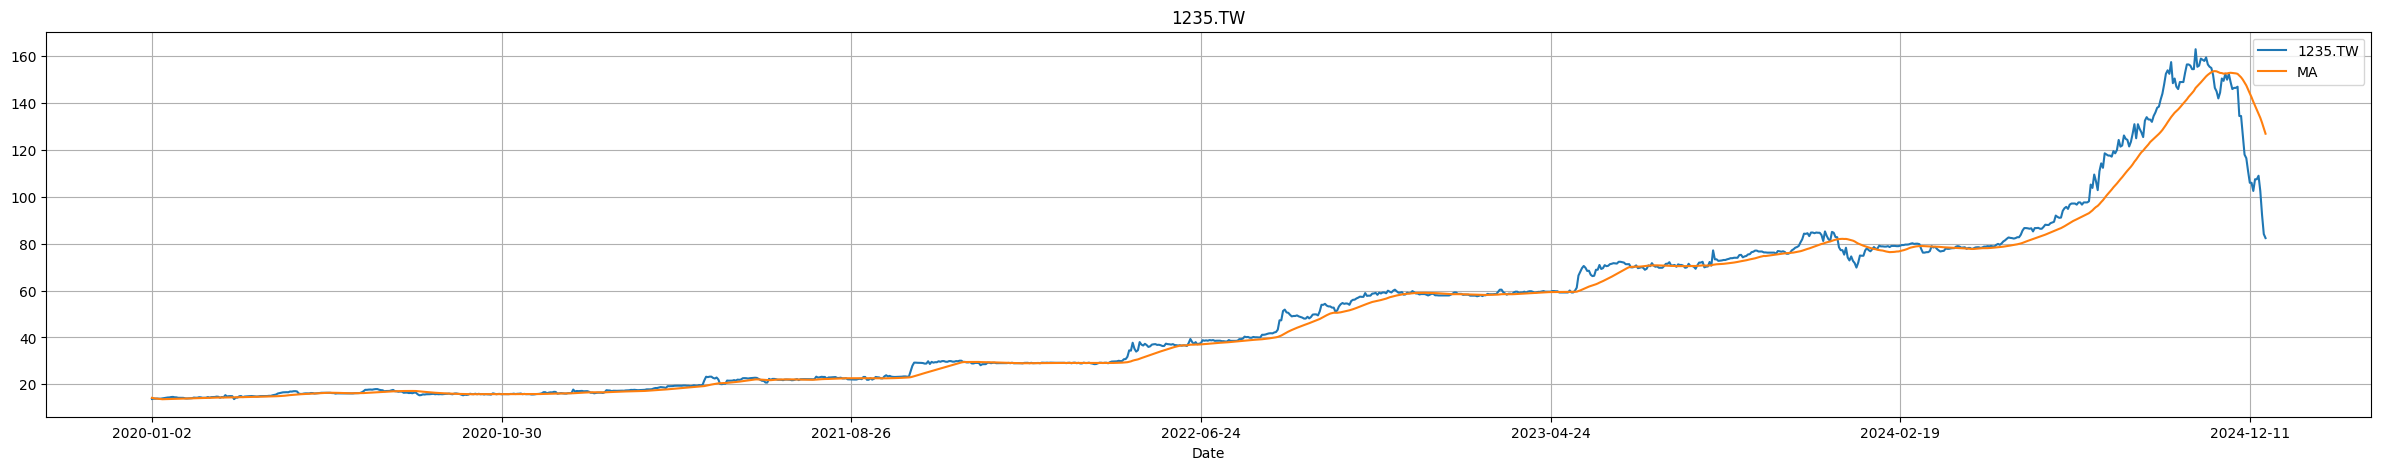

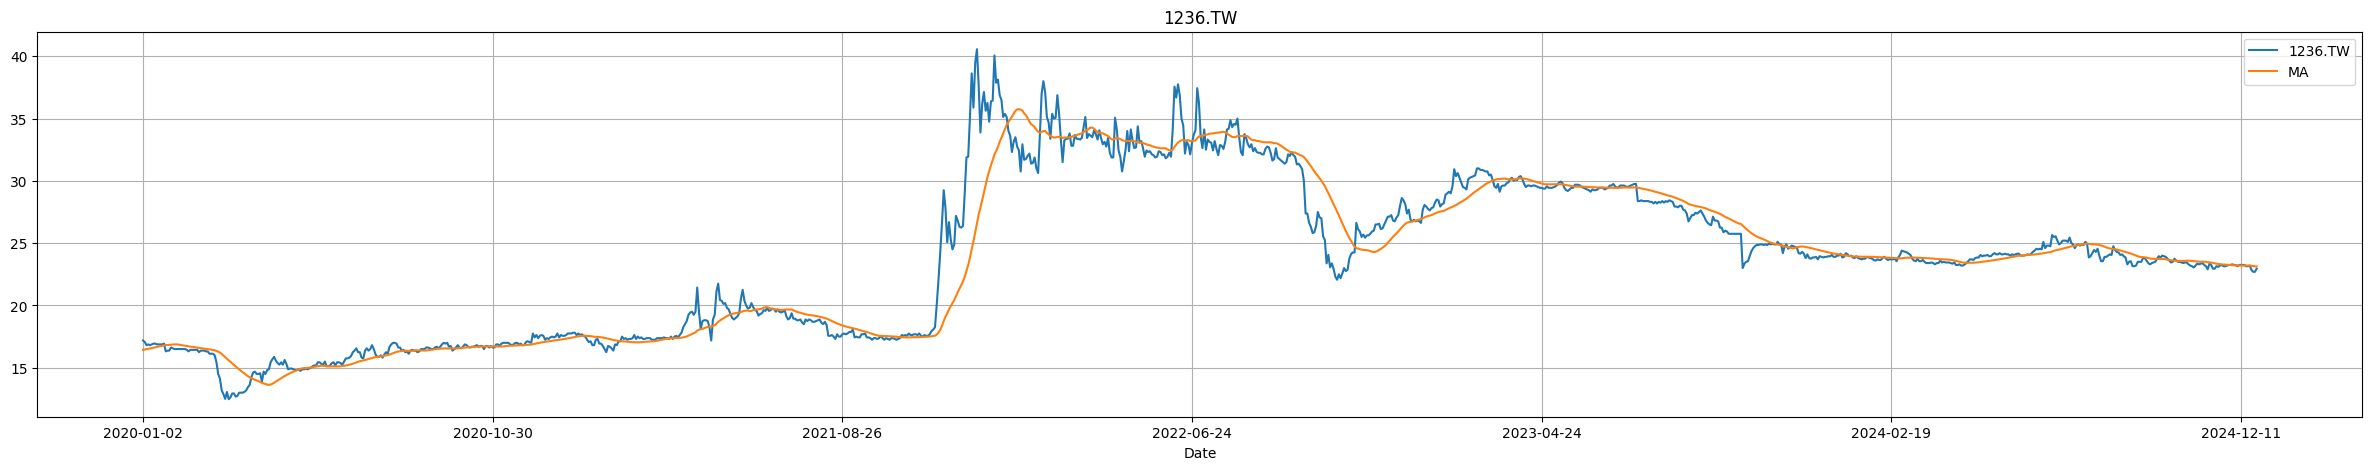

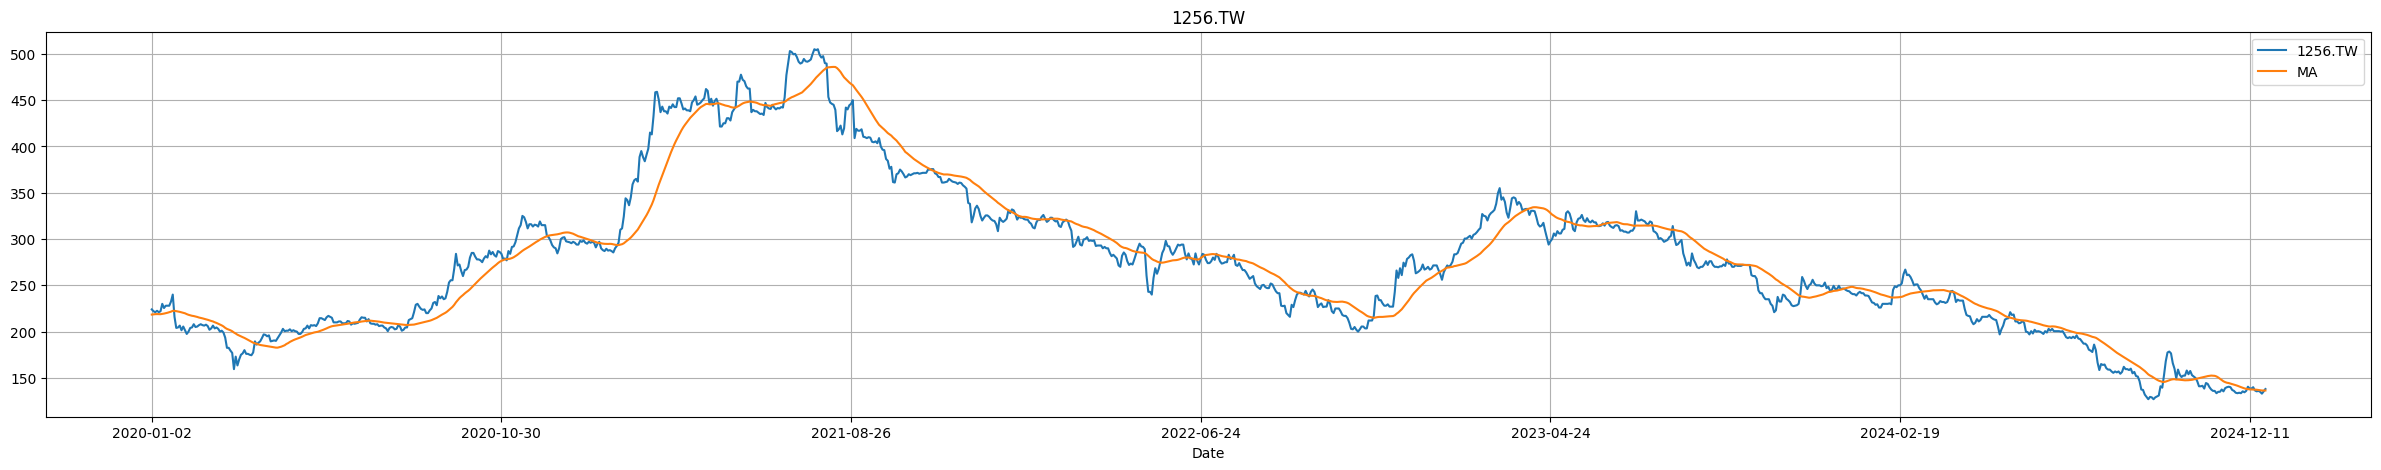

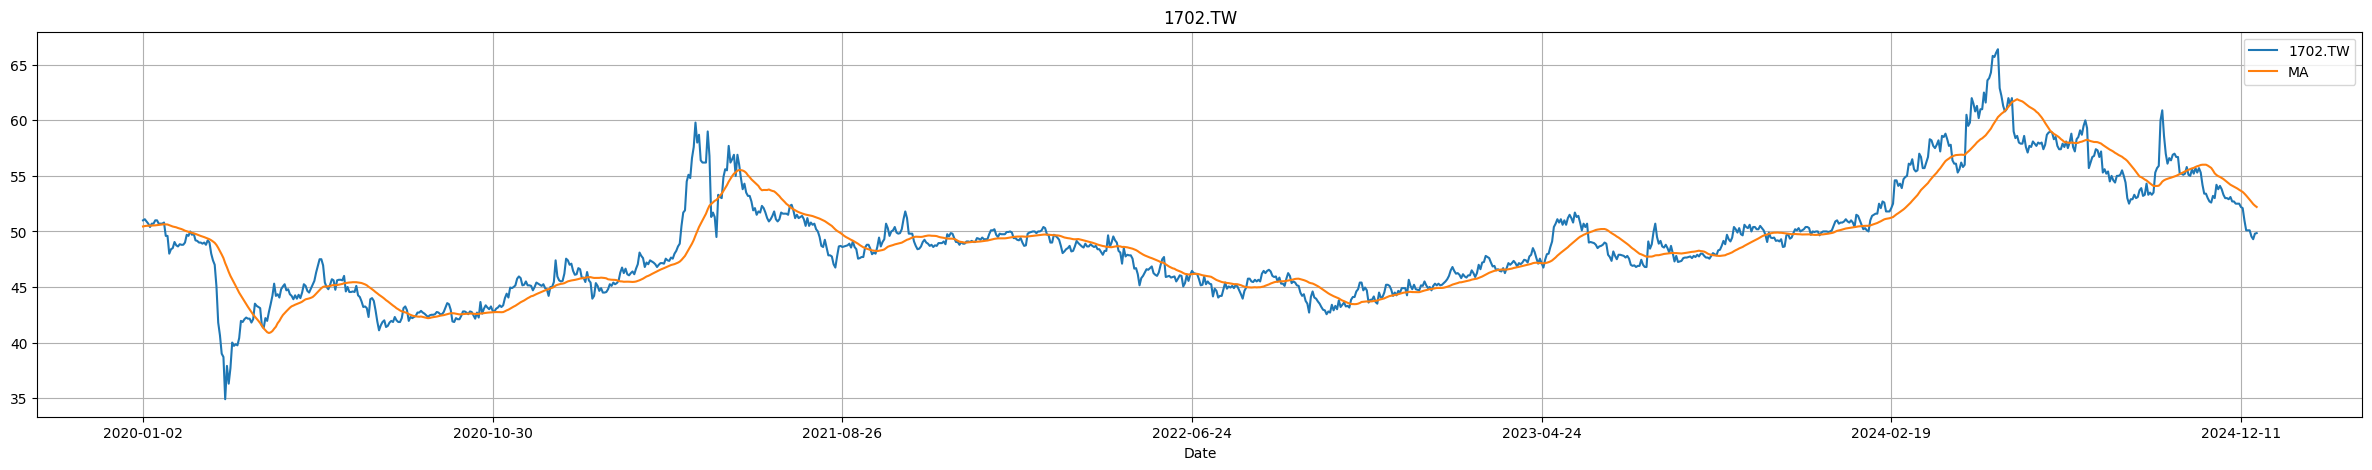

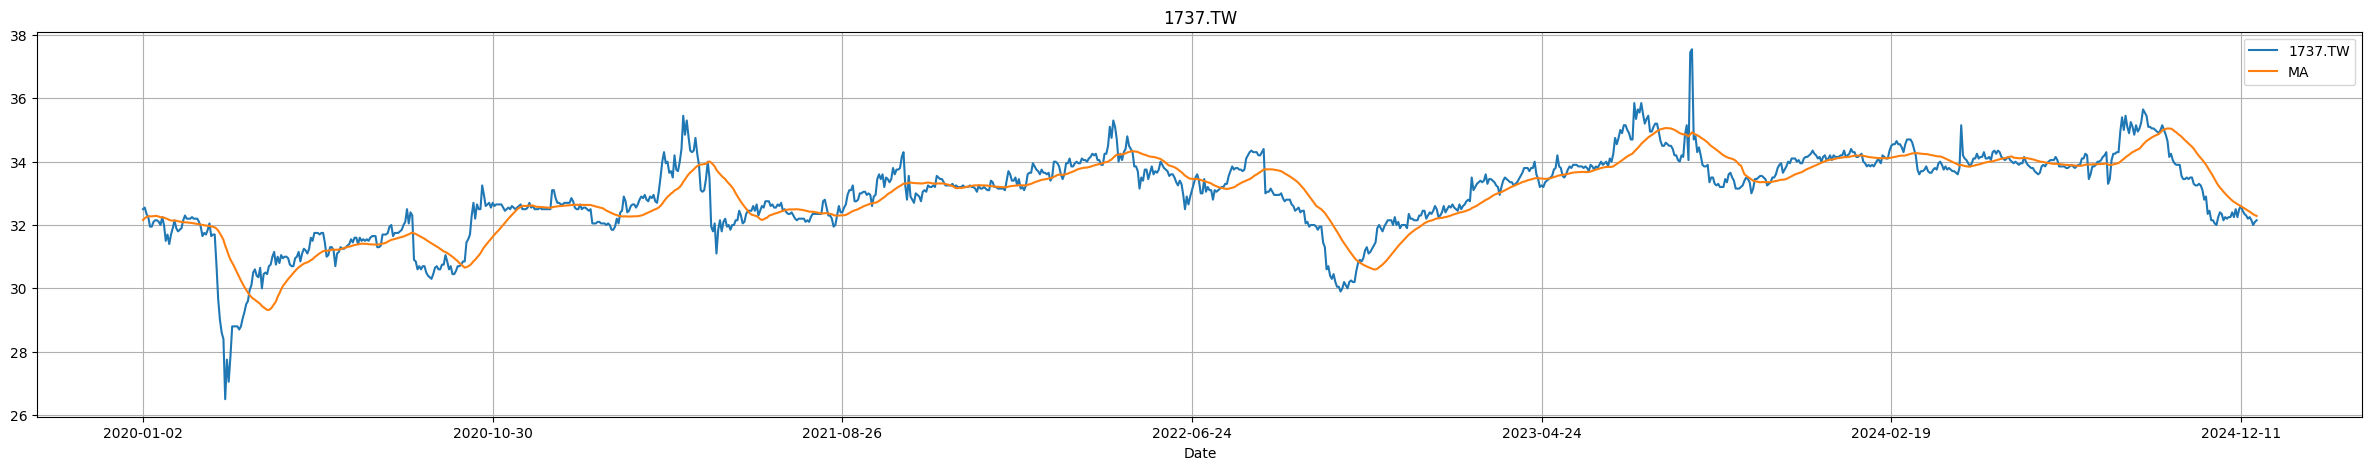

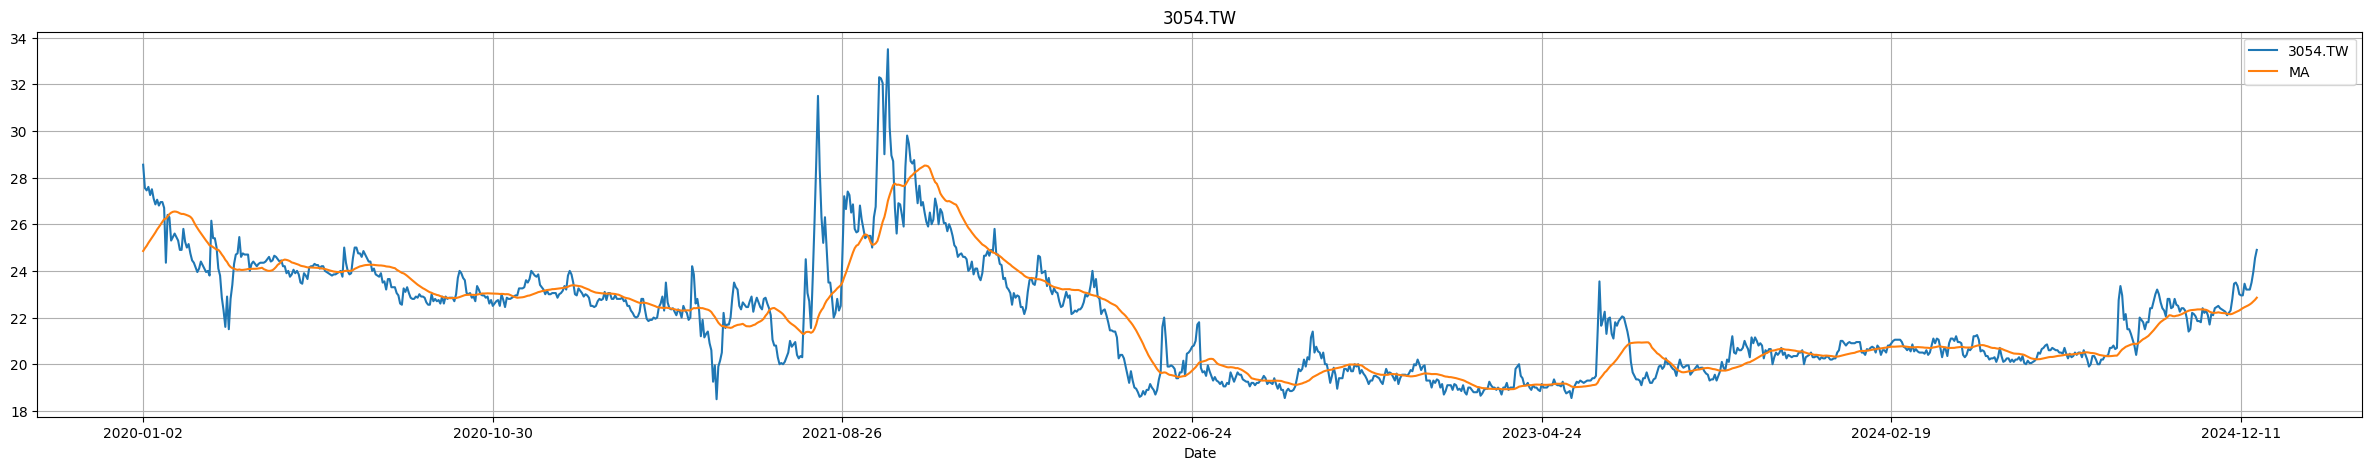

In [7]:
# print MA for all food data
for symbol in food_stock_ticker:
    file_path = f"data\\{symbol}.csv"
    df = pd.read_csv(file_path, index_col="Date", usecols=["Date","Close"])
    df=df.rename(columns={"Close":symbol})
    df["MA"]=df[symbol].rolling(30).mean()#在原先的DataFrmae df的右邊再新增一個自己定義的欄位df["MA"]
    df=df["2020":"2025"]#只擷取某個日期期間
    df.plot(title=symbol,figsize=(30,5),grid=True)
    plt.show()

In [8]:
start_date = "2020-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

In [9]:
# 確保 Date 是 Datetime 格式
all_food_data.index = pd.to_datetime(all_food_data.index)

# 篩選日期範圍內的數據
all_food_data = all_food_data[(all_food_data.index >= start_date) & (all_food_data.index <= end_date)]

print(all_food_data.head())
print(all_food_data.tail())
print(f"篩選後的食品股數據範圍: {all_food_data.index.min()} 到 {all_food_data.index.max()}")

                 Open   High        Low  Close   AdjClose     Volume   Symbol
Date                                                                         
2020-01-02  25.100000  25.25  25.049999  25.15  21.907831   877254.0  1201.TW
2020-01-03  25.150000  25.35  25.049999  25.10  21.864279  1126794.0  1201.TW
2020-01-06  25.100000  25.10  24.650000  24.85  21.646509  1210288.0  1201.TW
2020-01-07  24.799999  24.85  24.500000  24.60  21.428734   944447.0  1201.TW
2020-01-08  24.750000  24.75  24.250000  24.25  21.123856  1742615.0  1201.TW
                 Open       High        Low      Close   AdjClose    Volume  \
Date                                                                          
2024-12-18  23.150000  23.200001  23.000000  23.200001  23.200001    9207.0   
2024-12-19  23.150000  23.500000  22.799999  23.500000  23.500000   35000.0   
2024-12-20  23.950001  24.049999  23.200001  23.950001  23.950001   87000.0   
2024-12-23  23.950001  24.549999  23.450001  24.549999  24.

In [10]:
# 確保 Date 是 Datetime 格式
taiex_data.index = pd.to_datetime(taiex_data.index)

# 篩選日期範圍內的數據
taiex_data = taiex_data[(taiex_data.index >= start_date) & (taiex_data.index <= end_date)]

# 確認篩選結果
print(taiex_data.head())
print(taiex_data.tail())
print(f"篩選後的台指期數據範圍: {taiex_data.index.min()} 到 {taiex_data.index.max()}")

                    Open          High           Low         Close  \
Date                                                                 
2020-01-02  12026.500000  12110.740234  12026.230469  12100.480469   
2020-01-03  12167.440430  12197.639648  12023.599609  12110.429688   
2020-01-06  12035.709961  12040.080078  11953.360352  11953.360352   
2020-01-07  11961.969727  11986.030273  11822.400391  11880.320312   
2020-01-08  11818.759766  11899.669922  11777.450195  11817.099609   

                AdjClose     Volume  
Date                                 
2020-01-02  12100.480469  2023800.0  
2020-01-03  12110.429688  2572900.0  
2020-01-06  11953.360352  2345200.0  
2020-01-07  11880.320312  2338400.0  
2020-01-08  11817.099609  2428800.0  
                    Open          High           Low         Close  \
Date                                                                 
2024-12-18  23014.429688  23211.169922  22934.589844  23168.669922   
2024-12-19  22947.560547  22947.5

In [11]:
# 取日期交集
common_dates = all_food_data.index.intersection(taiex_data.index)

# 保留交集部分
all_food_data = all_food_data.loc[common_dates]
taiex_data = taiex_data.loc[common_dates]

In [12]:
for i in food_stock_ticker:
    print(all_food_data[all_food_data['Symbol'] == i].index)
print("="*50)
print(taiex_data.index)

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-12-11', '2024-12-12', '2024-12-13', '2024-12-16',
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24'],
              dtype='datetime64[ns]', name='Date', length=1210, freq=None)
DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-12-11', '2024-12-12', '2024-12-13', '2024-12-16',
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24'],
              dtype='datetime64[ns]', name='Date', length=1210, freq=None)
DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',

In [13]:
# 計算移動平均線 (Moving Average, MA)
def calculate_moving_average(df, window, column='NormalizedAdjClose'):
    return df[column].rolling(window=window).mean()

In [14]:
# 計算 RSI (相對強弱指標)
def calculate_rsi(df, window):
    delta = df['AdjClose'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [15]:
# 計算食品股和台指期的相關性
def calculate_correlation(stock_df, taiex_df):
    return stock_df['AdjClose'].corr(taiex_df['AdjClose'])

In [16]:
def normalize_min_max(df, column='AdjClose'):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [17]:
def normalize_zscore(df, column='AdjClose'):
    return (df[column] - df[column].mean()) / df[column].std()

In [18]:
# 繪製趨勢圖
# def plot_trends(stock_df, taiex_df, symbol):
#     plt.figure(figsize=(14, 7))
#     plt.plot(stock_df.index, stock_df['AdjClose'], label=f'{symbol} AdjClose', color='blue')
#     plt.plot(stock_df.index, calculate_moving_average(stock_df, window=20), label=f'{symbol} MA(20)', color='orange')
#     plt.plot(stock_df.index, calculate_moving_average(stock_df, window=50), label=f'{symbol} MA(50)', color='green')
#     plt.plot(taiex_df.index, taiex_df['AdjClose'], label='TAIEX AdjClose', color='red', alpha=0.5)
#     plt.title(f'Trend Analysis for {symbol} and TAIEX')
#     plt.xlabel('Date')
#     plt.ylabel('Adjusted Close')
#     plt.legend()
#     plt.grid()
#     plt.show()
def plot_trends_normalize(stock_df, taiex_df, symbol):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_df.index, stock_df['NormalizedAdjClose'], label=f'{symbol} Normalized AdjClose', color='blue')
    plt.plot(taiex_df.index, taiex_df['NormalizedAdjClose'], label='TAIEX Normalized AdjClose', color='red', alpha=0.5)
    plt.title(f'Trend Analysis for {symbol} and TAIEX (Normalized)')
    plt.xlabel('Date')
    plt.ylabel('Normalized Adjusted Close')
    plt.legend()
    plt.grid()
    plt.show()

1201.TW 與台指期的相關性: -0.04


C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


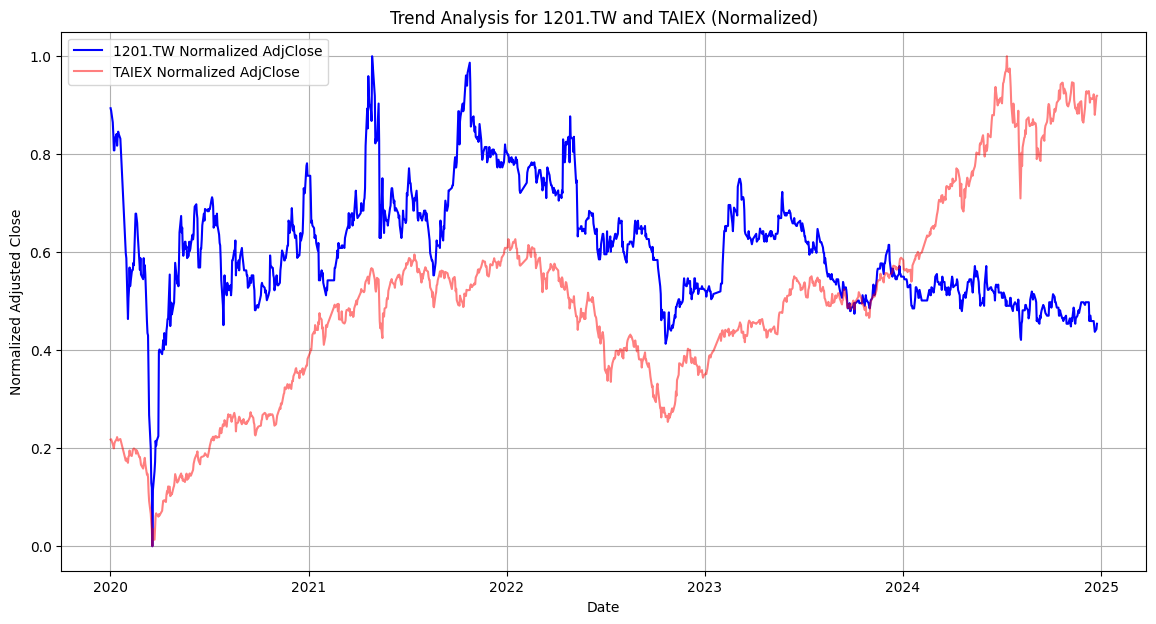

1203.TW 與台指期的相關性: 0.78


C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


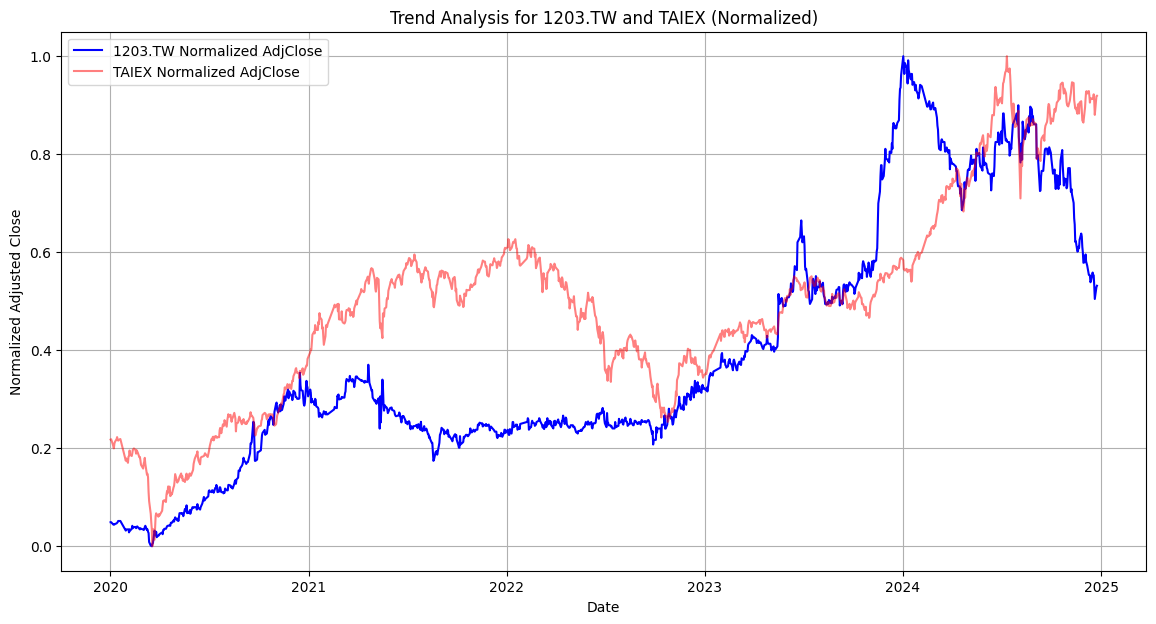

C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


1210.TW 與台指期的相關性: 0.86


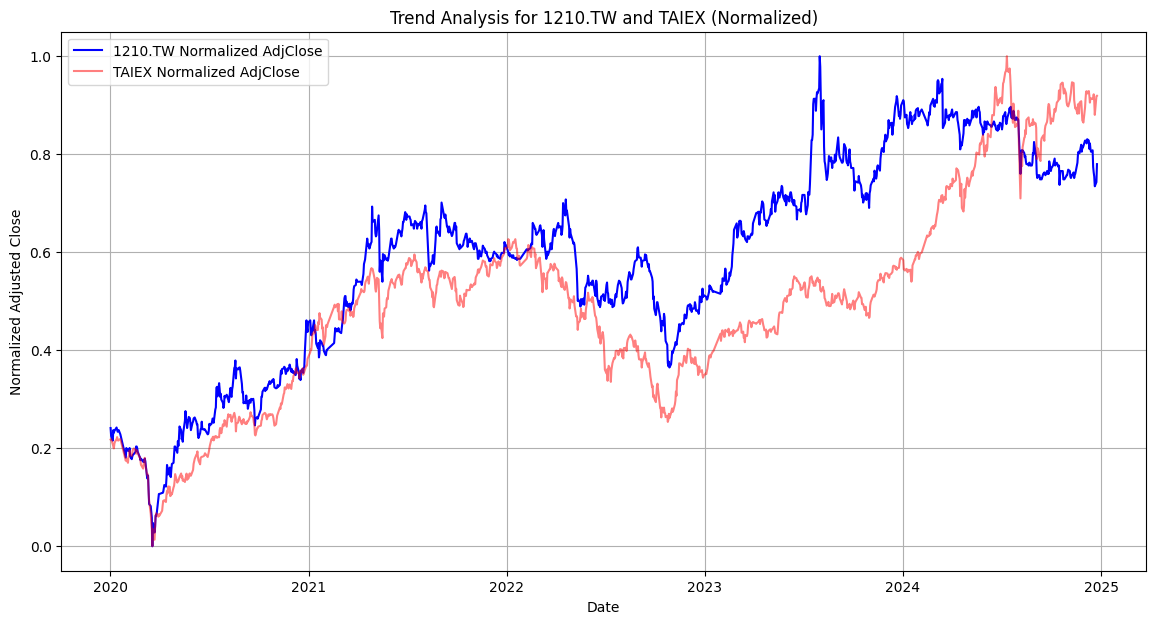

1213.TW 與台指期的相關性: 0.55


C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


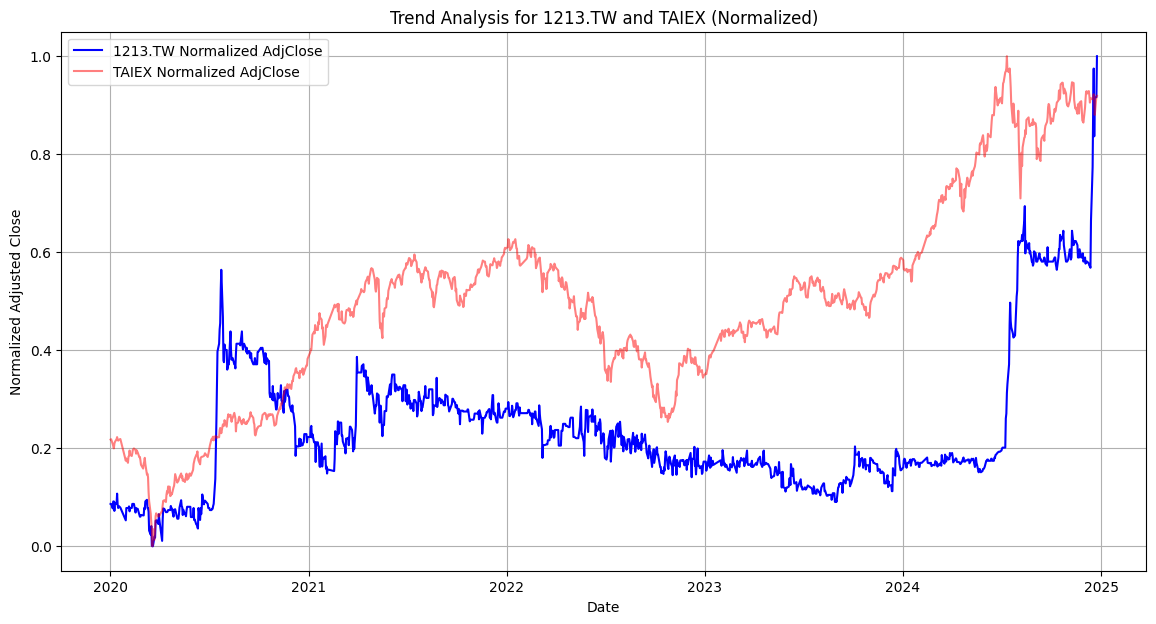

1215.TW 與台指期的相關性: 0.82


C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


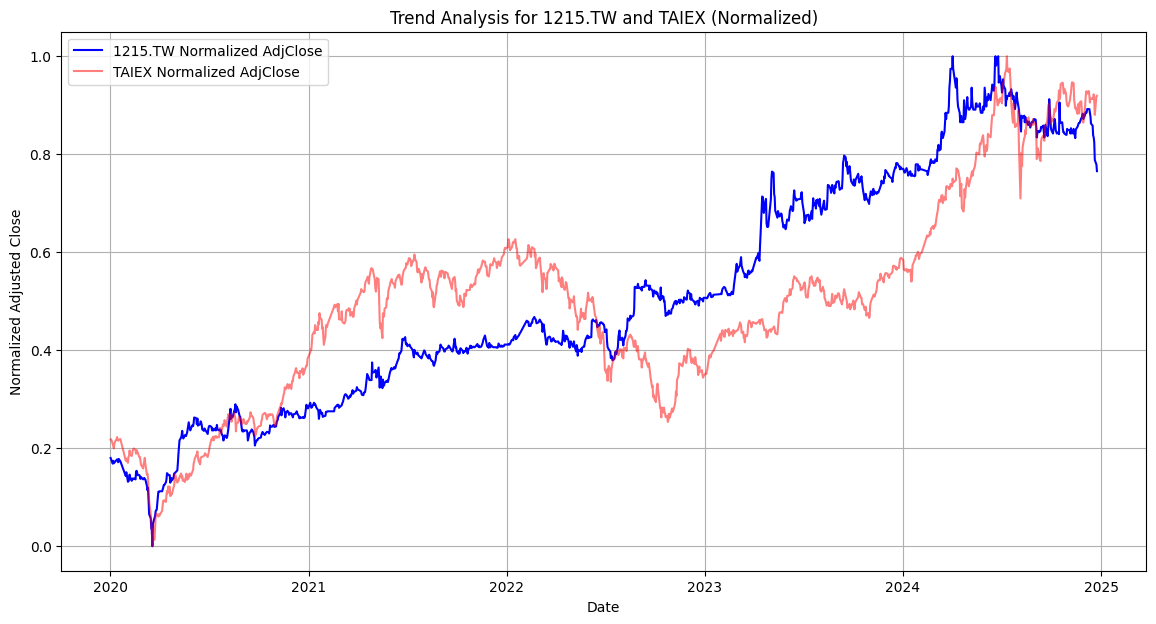

1216.TW 與台指期的相關性: 0.83


C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


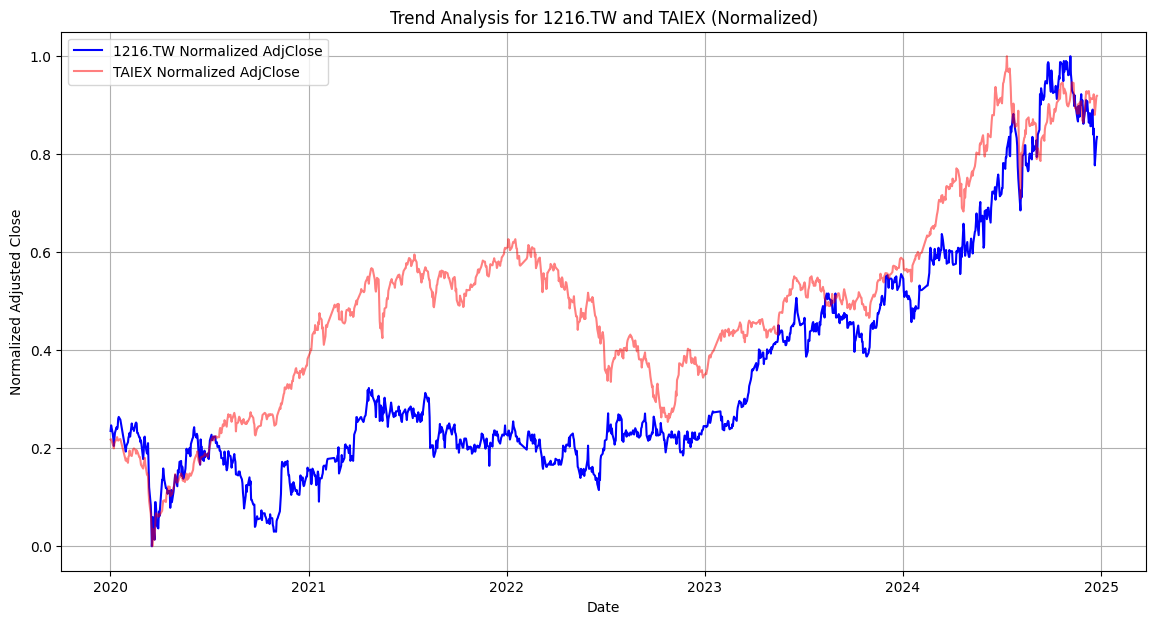

1217.TW 與台指期的相關性: 0.81


C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


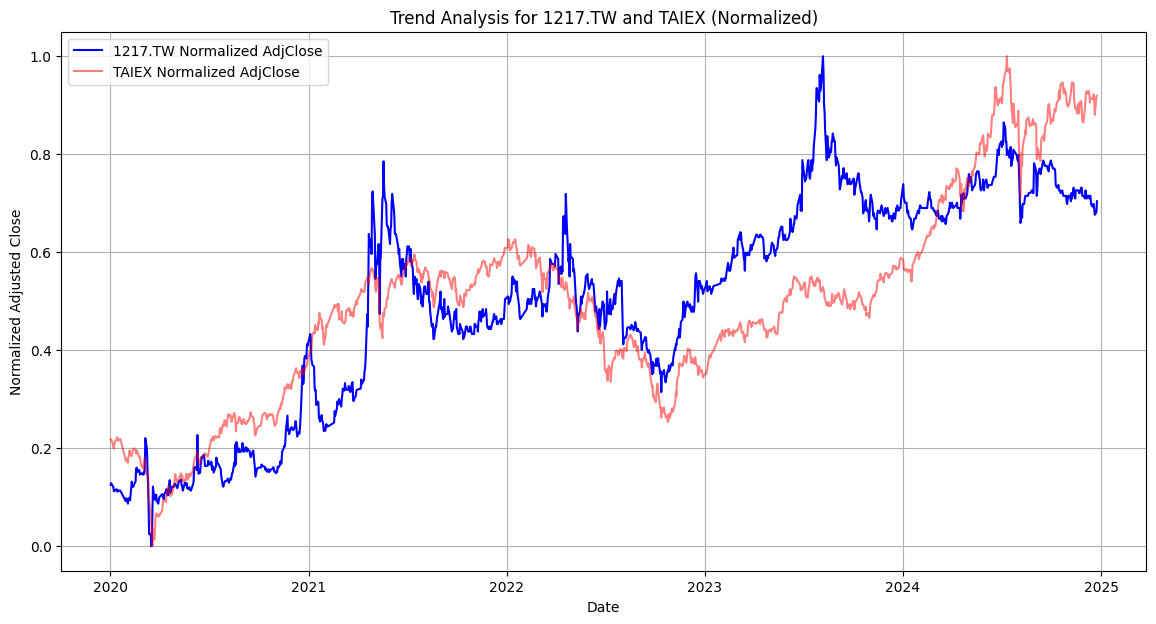

C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


1218.TW 與台指期的相關性: -0.13


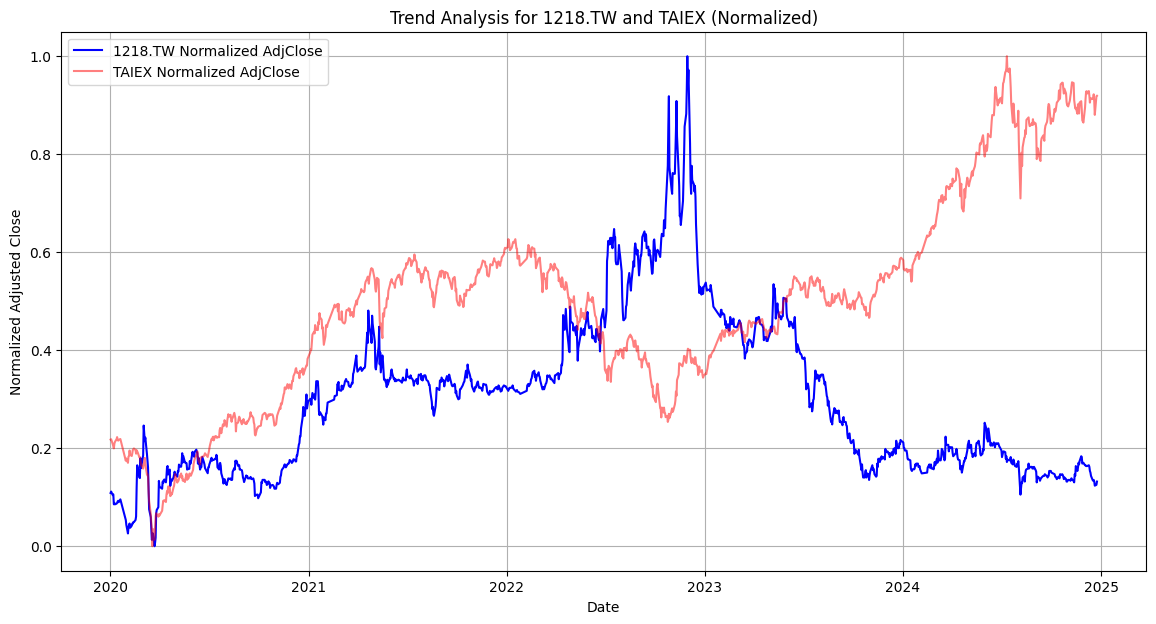

C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


1219.TW 與台指期的相關性: 0.41


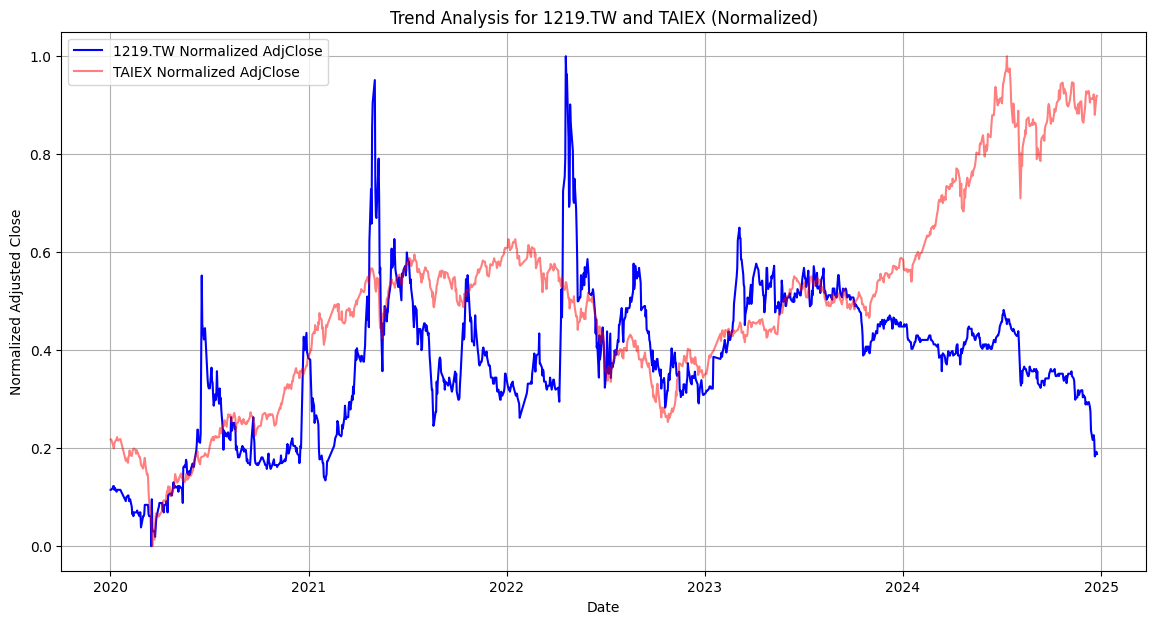

1220.TW 與台指期的相關性: 0.74


C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


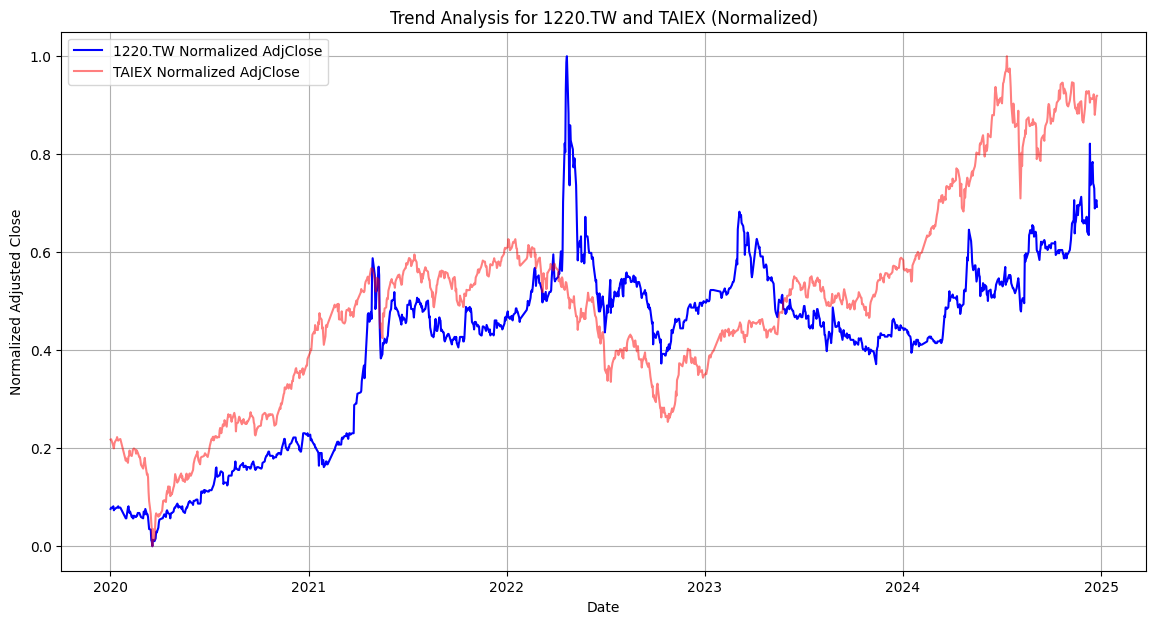

C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


1225.TW 與台指期的相關性: 0.75


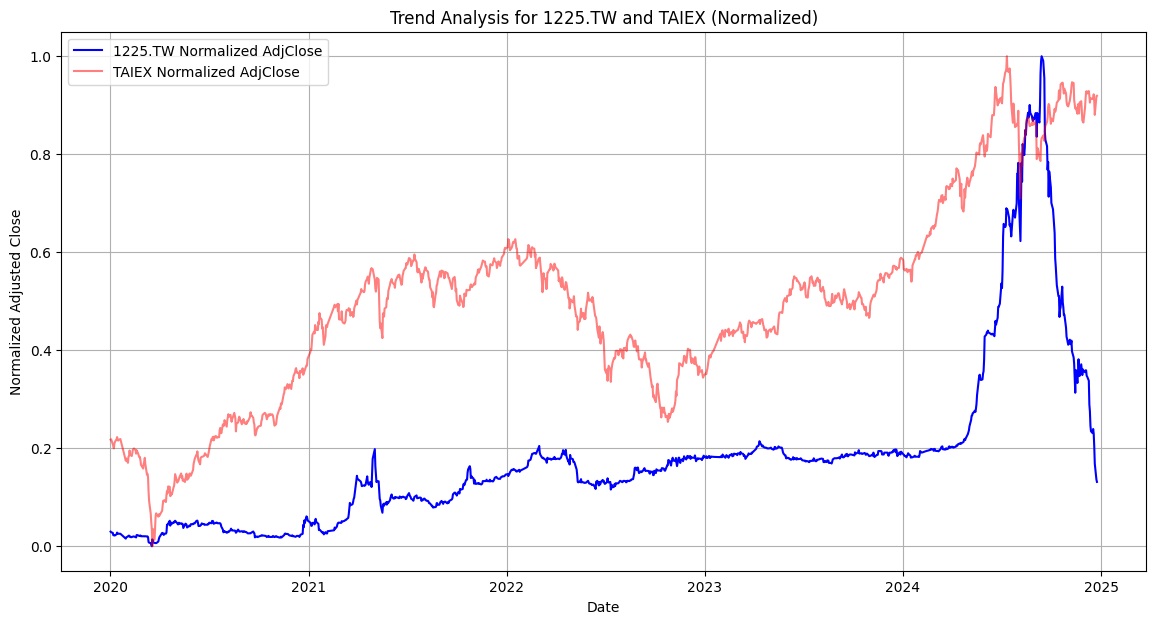

C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


1227.TW 與台指期的相關性: -0.56


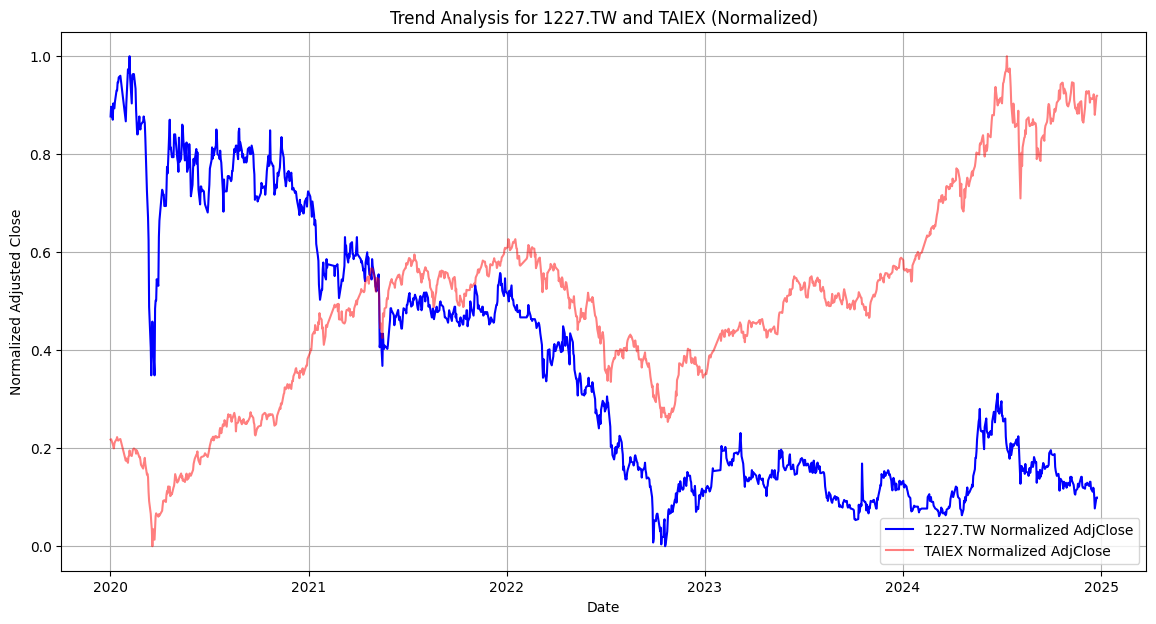

1229.TW 與台指期的相關性: 0.82


C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


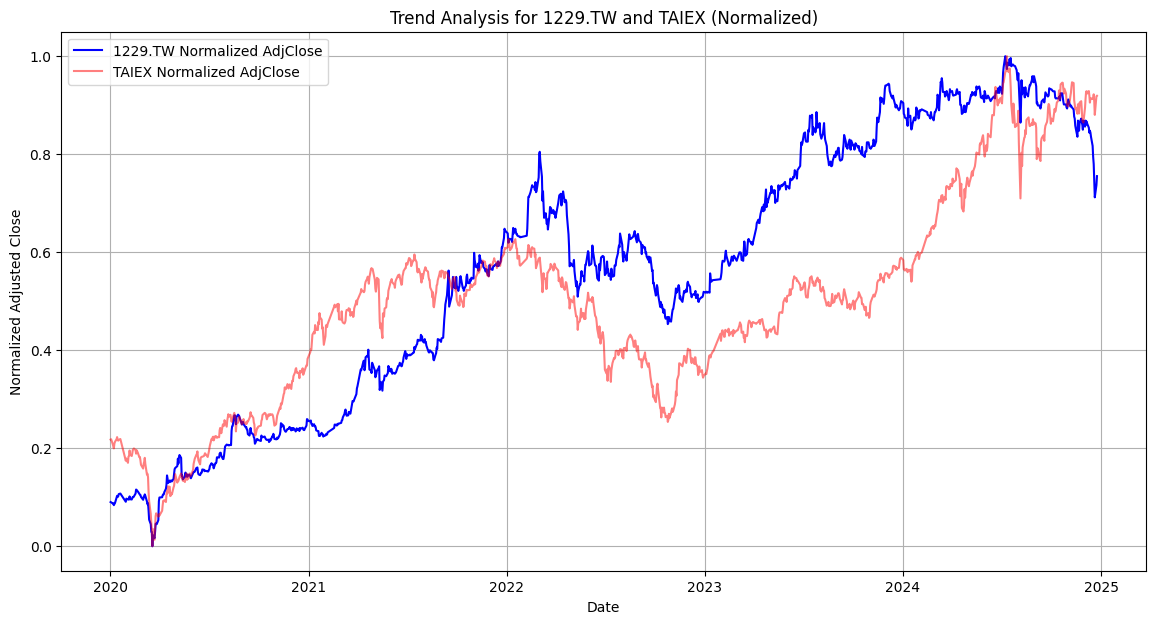

C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)


1231.TW 與台指期的相關性: 0.83


C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


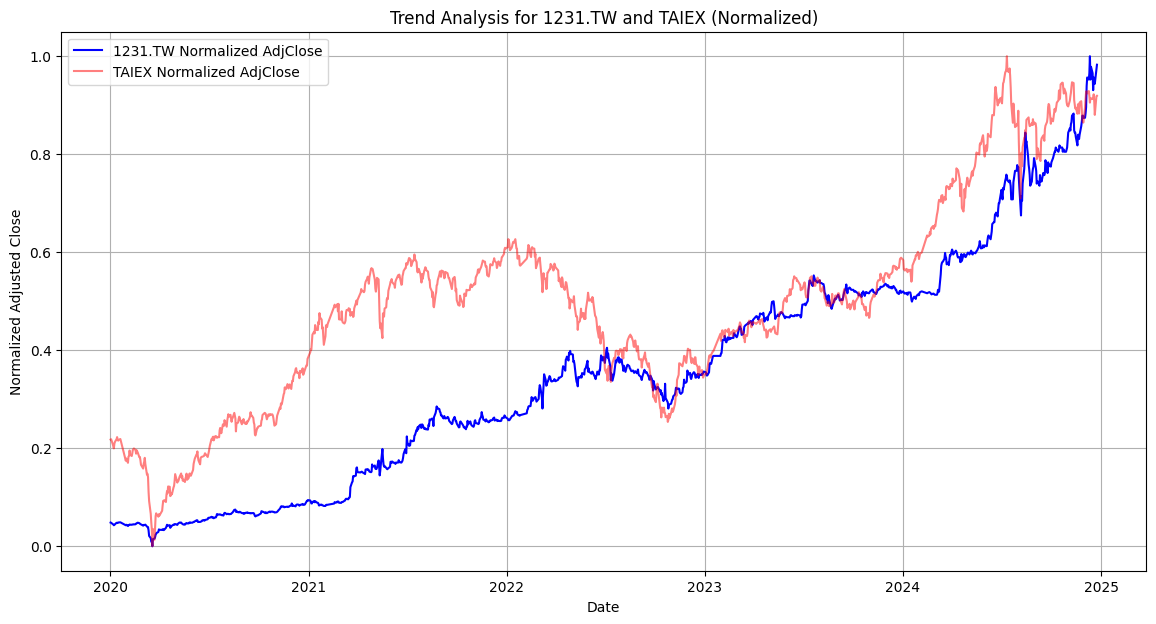

C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


1232.TW 與台指期的相關性: 0.76


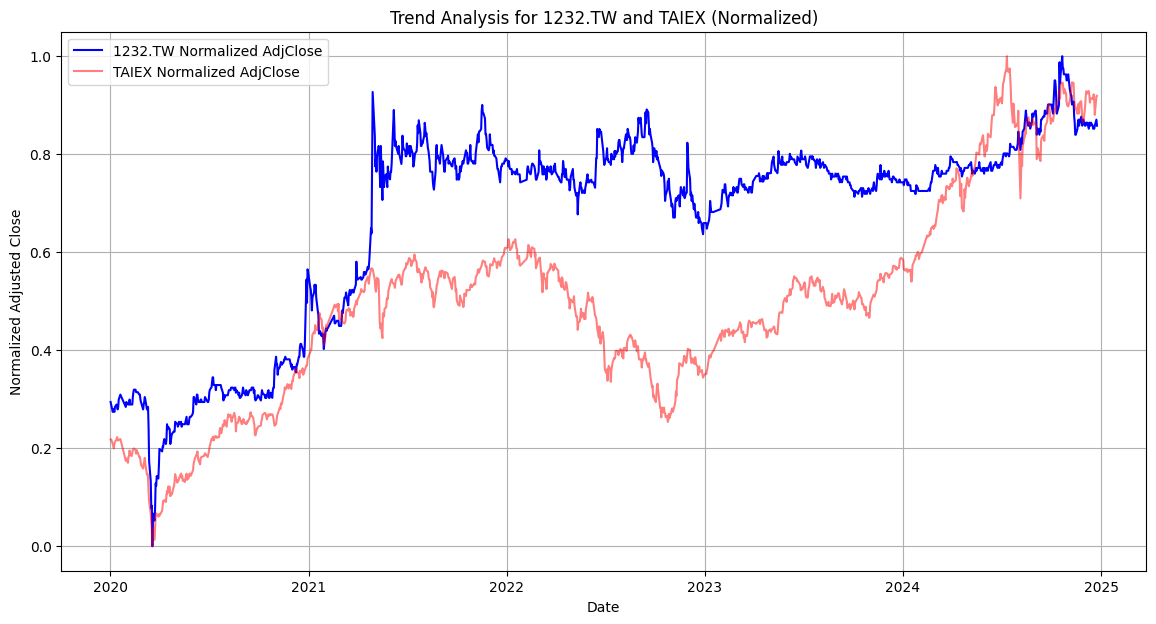

1233.TW 與台指期的相關性: 0.17


C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


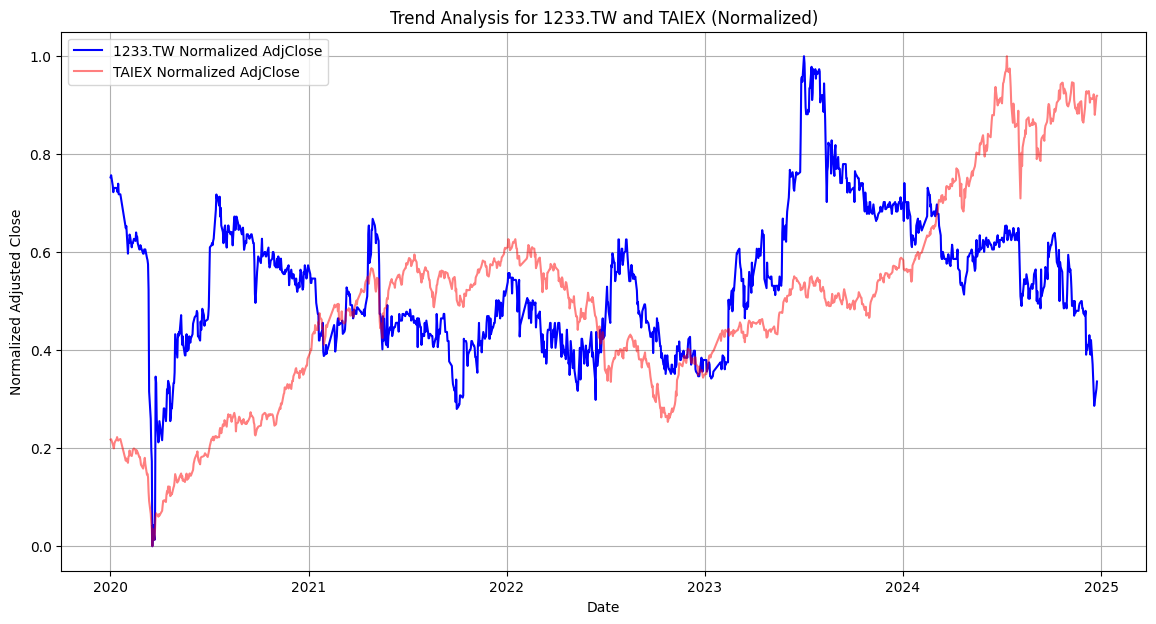

C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


1234.TW 與台指期的相關性: 0.87


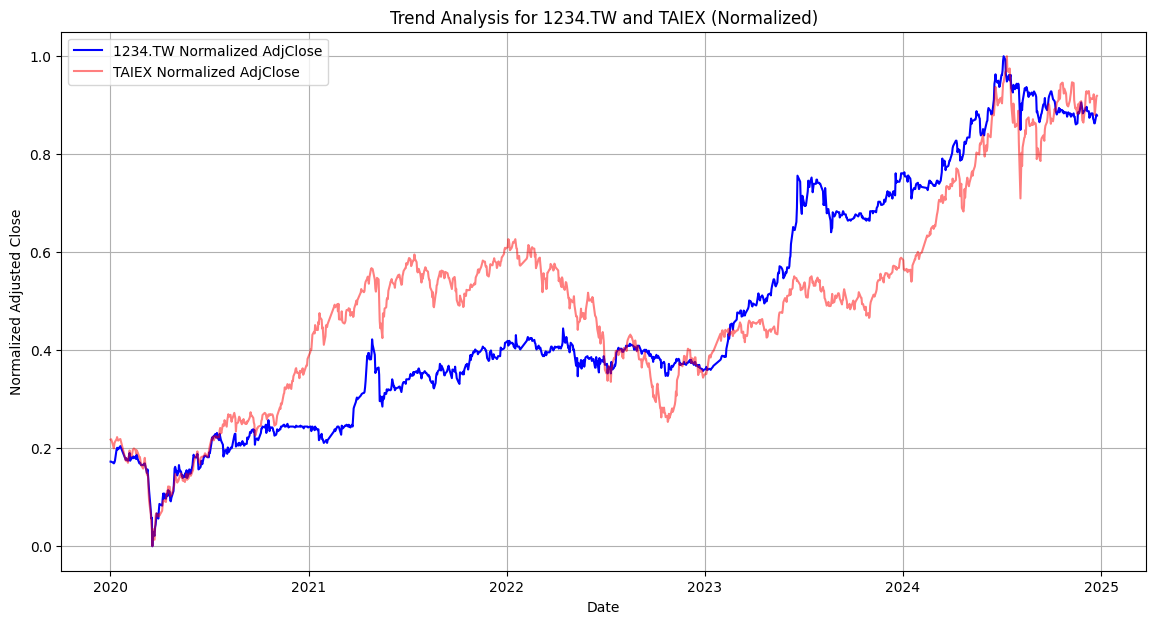

C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


1235.TW 與台指期的相關性: 0.75


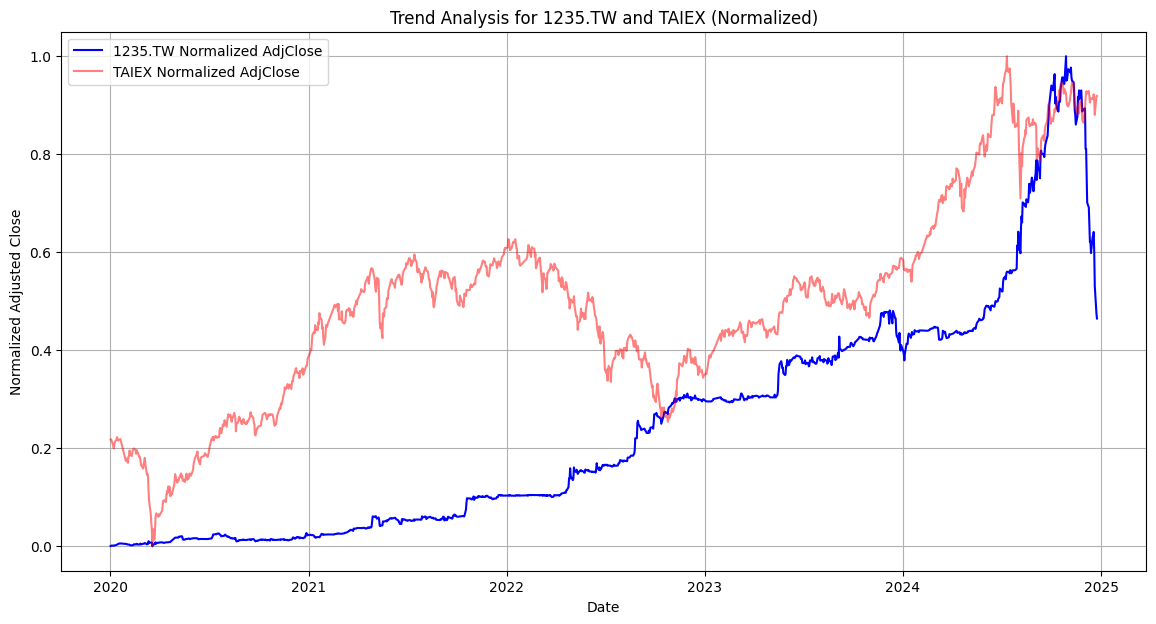

1236.TW 與台指期的相關性: 0.50


C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


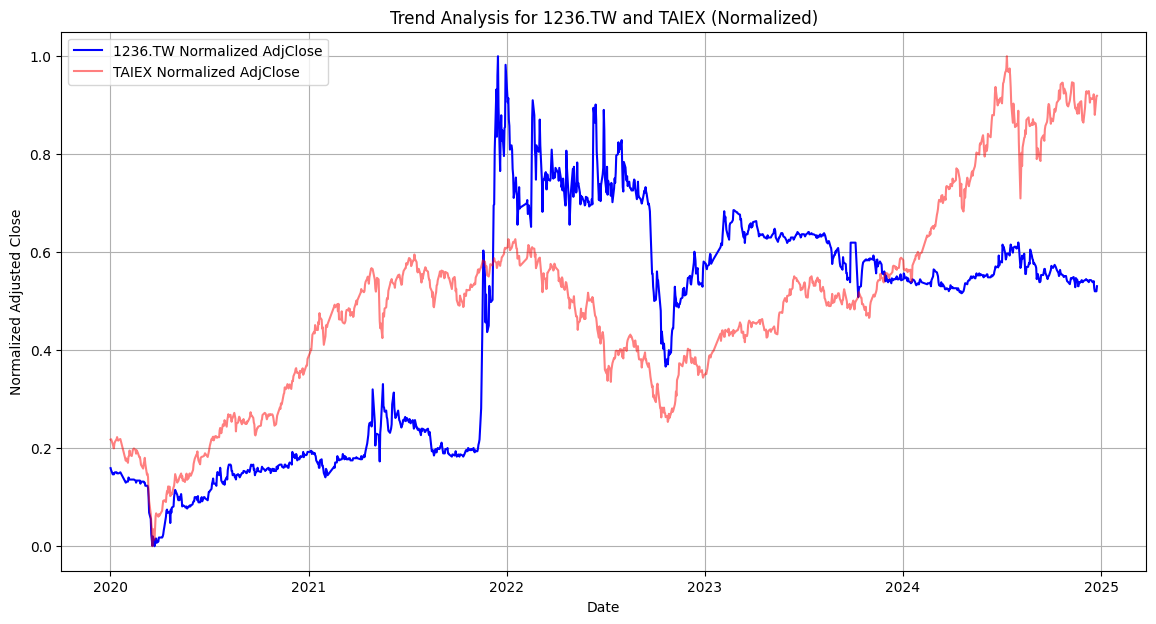

C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


1256.TW 與台指期的相關性: -0.00


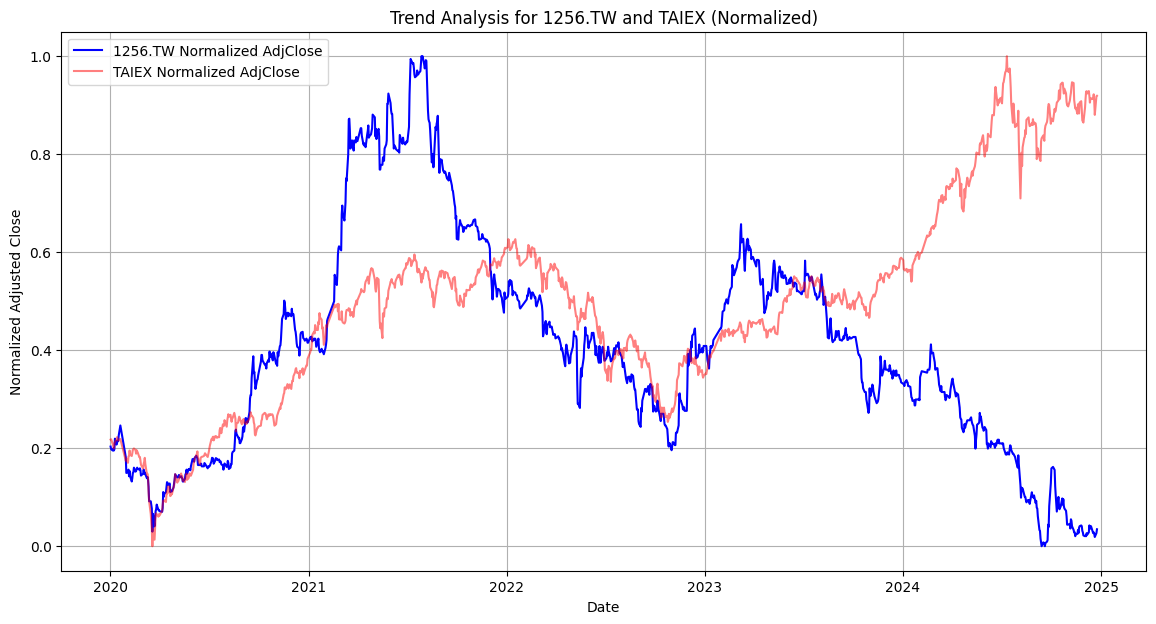

C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


1702.TW 與台指期的相關性: 0.90


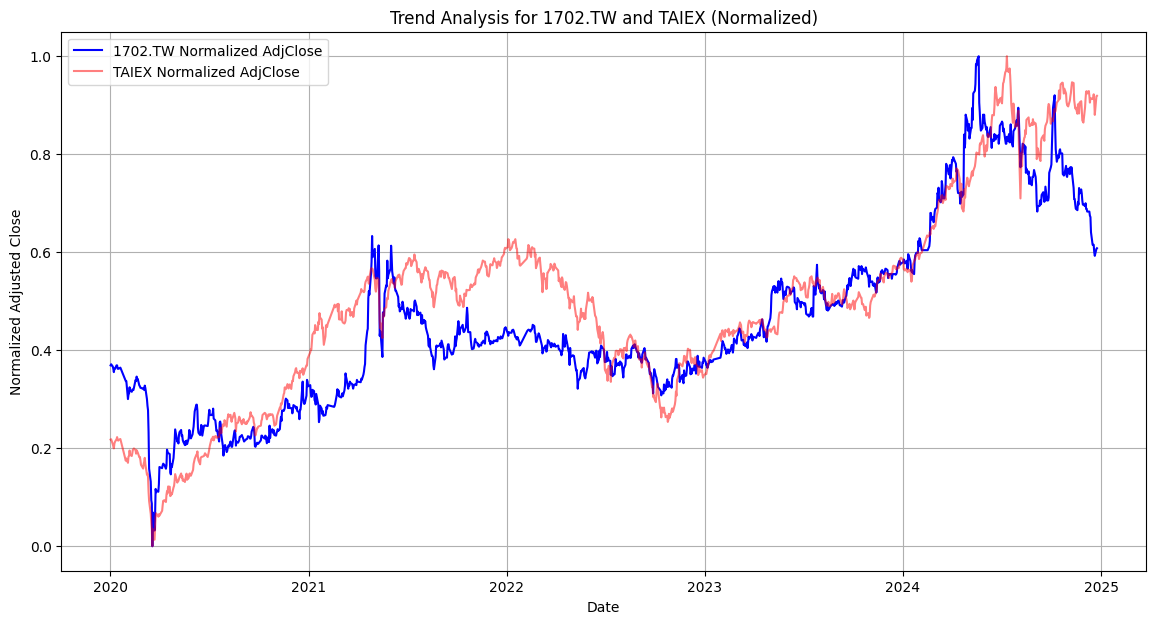

C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


1737.TW 與台指期的相關性: 0.80


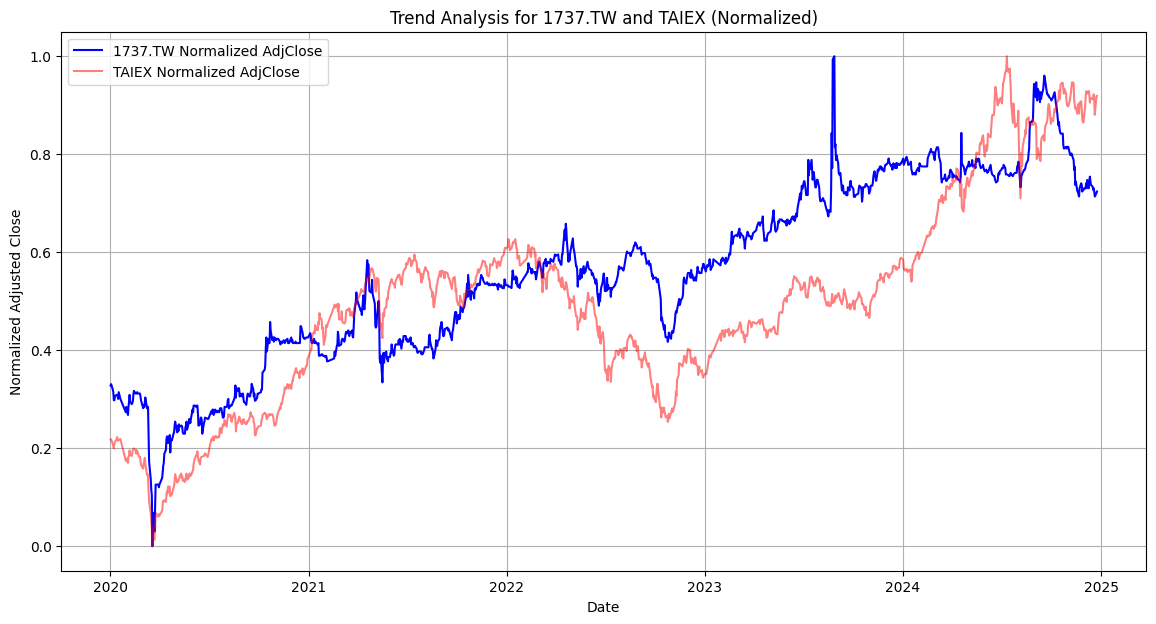

3054.TW 與台指期的相關性: -0.18


C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RSI"] = calculate_rsi(data, window=14)
C:\Users\kyynk\AppData\Local\Temp\ipykernel_1132\1787254950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAdjClose"] =  normalize_min_max(data)


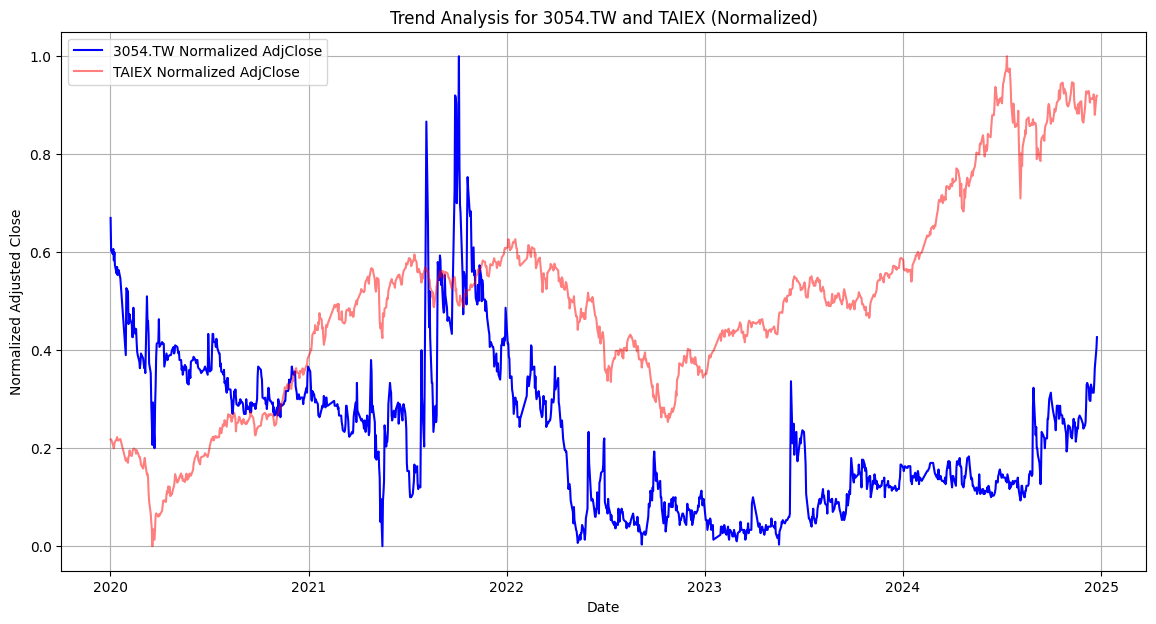

In [19]:
taiex_data['NormalizedAdjClose'] = normalize_min_max(taiex_data)
for symbol in food_stock_ticker:
    data = all_food_data[all_food_data['Symbol'] == symbol]
    data["RSI"] = calculate_rsi(data, window=14)
    correlation = calculate_correlation(data, taiex_data)
    print(f"{symbol} 與台指期的相關性: {correlation:.2f}")
    # 
    data["NormalizedAdjClose"] =  normalize_min_max(data)
    # print(data)
    # print(taiex_data)
    # print("*"*50)
    plot_trends_normalize(data, taiex_data, symbol)
    